In [30]:
# LSW Mu;i Labelled Classification
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import OneHotEncoder
import scipy.sparse

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from collections.abc import Sequence, Set

dataset_dir_path = "~/Desktop/Tickets"
categorical_columns = ['Kategorie ID', 'Unterkategorie ID']

tickets = pd.read_csv(f"{dataset_dir_path}/tickets.csv")

tickets.head()
# tickets.count()

,Unnamed: 0.1,Unnamed: 0,ID,Text,Timestamp,Beschreibung,Kategorie ID,Unterkategorie ID,Ticket Label,Abteilung Label,...,stemmed_beschreibung,Produkt Label (Merged),RandomForestClassifier Predictions,New Labels,SVC Predictions,MultinomialNB Predictions,LogisticRegression Predictions,KNeighborsClassifier Predictions,error_count,unique_error_count
0,0,2,2000014953,sehr geehrte damen und herren leider wird mir...,2024-01-03 11:13:31,mandantenrücksetzung s77 mandant 303,ZSD_SR_S4HANA,ZSD_SR_S4HANA_MR,2. Level,Basis,...,mandantenrucksetz s77 mandant 303,global bike,global bike,"global bike,Entwicklungssystem bzw. Mandant",global bike,global bike,global bike,Entwicklungssystem bzw. Mandant,1,1
1,1,9,2000014960,sehr geehrte damen und herren ich hatte im de...,2024-01-08 08:34:13,prüfung am 3001 ab 1430 uhr,ZSD_SR_GUI,,2. Level,Applikation,...,prufung 3001 1430,global bike,Sonstiges,"global bike,Sonstiges",Sonstiges,Sonstiges,Sonstiges,global bike,4,1
2,2,10,2000014961,from saad sameh ssaadshuacuk sent friday janua...,2024-01-08 09:17:17,financial accounting module,ZSD_SR_S4HANA,ZSD_SR_S4HANA_SON,2. Level,Applikation,...,financi account modul,Sonstiges,global bike,"global bike,Sonstiges",global bike,global bike,global bike,global bike,5,1
3,3,11,2000014962,sehr geehrte damen und herren hiermit sende i...,2024-01-08 09:35:49,ts410 kursanmeldung,ZSD_SR_TERP,ZSD_SR_TERP_ANF,2. Level,Applikation,...,ts410 kursanmeld,TS410,TS410,TS410,TS410,TS410,TS410,TS410,0,0
4,4,13,2000014964,hello i am new to sap admin with your help i ...,2024-01-08 13:09:43,gui requirement,ZSD_SR_S4HANA,ZSD_SR_S4HANA_SON,2. Level,Applikation,...,gui requir,global bike,global bike,global bike,global bike,global bike,global bike,global bike,0,0


In [31]:
del tickets['New Labels']

In [32]:
def create_new_labels(row):
    # Get the values of the specified columns in the row
    predictions = row[['Produkt Label (Merged)',
                       'RandomForestClassifier Predictions',
                       'SVC Predictions',
                       'MultinomialNB Predictions',
                       'LogisticRegression Predictions',
                       'KNeighborsClassifier Predictions']]
    # Count unique values that are strings (considered errors)
    return ','.join(set(predictions))

tickets['New Labels'] = tickets.apply(create_new_labels, axis=1)

tickets.head()

,Unnamed: 0.1,Unnamed: 0,ID,Text,Timestamp,Beschreibung,Kategorie ID,Unterkategorie ID,Ticket Label,Abteilung Label,...,stemmed_beschreibung,Produkt Label (Merged),RandomForestClassifier Predictions,SVC Predictions,MultinomialNB Predictions,LogisticRegression Predictions,KNeighborsClassifier Predictions,error_count,unique_error_count,New Labels
0,0,2,2000014953,sehr geehrte damen und herren leider wird mir...,2024-01-03 11:13:31,mandantenrücksetzung s77 mandant 303,ZSD_SR_S4HANA,ZSD_SR_S4HANA_MR,2. Level,Basis,...,mandantenrucksetz s77 mandant 303,global bike,global bike,global bike,global bike,global bike,Entwicklungssystem bzw. Mandant,1,1,"global bike,Entwicklungssystem bzw. Mandant"
1,1,9,2000014960,sehr geehrte damen und herren ich hatte im de...,2024-01-08 08:34:13,prüfung am 3001 ab 1430 uhr,ZSD_SR_GUI,,2. Level,Applikation,...,prufung 3001 1430,global bike,Sonstiges,Sonstiges,Sonstiges,Sonstiges,global bike,4,1,"Sonstiges,global bike"
2,2,10,2000014961,from saad sameh ssaadshuacuk sent friday janua...,2024-01-08 09:17:17,financial accounting module,ZSD_SR_S4HANA,ZSD_SR_S4HANA_SON,2. Level,Applikation,...,financi account modul,Sonstiges,global bike,global bike,global bike,global bike,global bike,5,1,"Sonstiges,global bike"
3,3,11,2000014962,sehr geehrte damen und herren hiermit sende i...,2024-01-08 09:35:49,ts410 kursanmeldung,ZSD_SR_TERP,ZSD_SR_TERP_ANF,2. Level,Applikation,...,ts410 kursanmeld,TS410,TS410,TS410,TS410,TS410,TS410,0,0,TS410
4,4,13,2000014964,hello i am new to sap admin with your help i ...,2024-01-08 13:09:43,gui requirement,ZSD_SR_S4HANA,ZSD_SR_S4HANA_SON,2. Level,Applikation,...,gui requir,global bike,global bike,global bike,global bike,global bike,global bike,0,0,global bike


In [33]:
# Create new column 'error_count'
pred_cols = ['RandomForestClassifier Predictions',
                       'SVC Predictions',
                       'MultinomialNB Predictions',
                       'LogisticRegression Predictions',
                       'KNeighborsClassifier Predictions']

tickets['error_count'] = tickets.apply(lambda row: sum(row[col] != row['Produkt Label (Merged)'] for col in pred_cols), axis=1)

tickets['unique_error_count'] = tickets[pred_cols + ['Produkt Label (Merged)']].apply(lambda row: len(set(row) - set(row['Produkt Label (Merged)'])) - 1, axis=1)

# Display the updated DataFrame
incorrect_tickets = tickets[tickets['unique_error_count'] > 1]

# TICKETS WITH 2 WRONG TICKETS !!! (There are none with 3)
incorrect_tickets.head()

,Unnamed: 0.1,Unnamed: 0,ID,Text,Timestamp,Beschreibung,Kategorie ID,Unterkategorie ID,Ticket Label,Abteilung Label,...,stemmed_beschreibung,Produkt Label (Merged),RandomForestClassifier Predictions,SVC Predictions,MultinomialNB Predictions,LogisticRegression Predictions,KNeighborsClassifier Predictions,error_count,unique_error_count,New Labels
8,8,17,2000014968,hi team singapore university of social scienc...,2024-01-10 04:05:00,request gbi 41 and erpsim for suss,ZSD_SR_KTV,,2. Level,Applikation,...,request gbi 41 erpsim suss,ERPsim,Sonstiges,ERPsim,Sonstiges,global bike,global bike,4,2,"ERPsim,global bike,Sonstiges"
41,41,81,2000015032,hi team fpt university would like to exchange...,2024-01-30 02:59:30,request erpsim client for fpt,ZSD_SR_KTV,,2. Level,Vertrag,...,request erpsim client fpt,Sonstiges,Sonstiges,ERPsim,Sonstiges,ERPsim,global bike,3,2,"Sonstiges,global bike,ERPsim"
44,44,86,2000015037,hi team brawijaya university brawijaya is usi...,2024-01-31 05:39:44,assign s25303 for brawijaya university,ZSD_SR_KTV,,2. Level,Vertrag,...,assign s25303 brawijaya univers,Sonstiges,global bike,global bike,Sonstiges,global bike,UCC Portal,4,2,"Sonstiges,global bike,UCC Portal"
201,201,351,2000014055,hi team the below request is contract renewal...,2023-02-03 06:24:41,contract renewal for its,ZSD_SR_KTV,,2. Level,Vertrag,...,contract renew,ERPsim,global bike,global bike,Sonstiges,global bike,global bike,5,2,"ERPsim,global bike,Sonstiges"
263,263,457,2000014161,hi team sorry for the late notice because we ...,2023-03-14 05:29:16,contract expired for uajy,ZSD_SR_KTV,,2. Level,Vertrag,...,contract expir uaji,Sonstiges,global bike,global bike,Sonstiges,global bike,UCC Portal,4,2,"Sonstiges,global bike,UCC Portal"


In [34]:
# Latest Messages by Group
# tickets.groupby(['Produkt Label (Merged)'])['Timestamp'].max()

# Remove Celonis & Business by Design because they haven't received messages for months
# tickets = ticketsALL[(ticketsALL['Produkt Label (Merged)'] != 'Celonis') & (ticketsALL['Produkt Label (Merged)'] != 'Business By Design')]

In [35]:
# # print('All Tickets Count:', tickets.count())
# single_correct_tickets = tickets[-tickets['New Labels'].str.contains(',')]
# # print('All Error Tickets Count:', single_incorrect_tickets.count())
# single_correct_tickets = single_correct_tickets[['Text', 'Beschreibung', 'Kategorie ID', 'Unterkategorie ID', 'stemmed_text', 'stemmed_beschreibung', 'Produkt Label (Merged)', 'New Labels']]
# single_correct_tickets.head()
# single_correct_tickets.to_excel('~/Desktop/correct_tickets.xlsx')

In [36]:
# num_labels = len(np.unique(single_incorrect_tickets['Produkt Label (Merged)'].to_numpy()))

# assert len(np.unique(tickets['Produkt Label (Merged)'].to_numpy())) == len(np.unique(single_incorrect_tickets['Produkt Label (Merged)'].to_numpy()))

def get_single_label_data(sample_table, x_category_col_keys, y_col_key, test_size = 0.2):
    x_col_keys = ['stemmed_text', 'stemmed_beschreibung'] + x_category_col_keys

    if 0 < test_size:
        x_train_raw, x_test_raw, y_train, y_test = train_test_split(
            sample_table[x_col_keys], # x
            sample_table[y_col_key].to_numpy(), # y
            test_size = test_size,
            random_state = 1)
    else:
        x_train_raw = sample_table[x_col_keys] # x
        x_test_raw = x_train_raw
        y_train = sample_table[y_col_key].to_numpy()
        y_test = y_train

    # Tfidf vectorization for the training set
    # TEXT column
    tfidf_vectorizer_text = TfidfVectorizer(max_features = 30)
    tfidf_matrix_text_train = tfidf_vectorizer_text.fit_transform(x_train_raw['stemmed_text'].values.astype('U'))
    # DESCRIPTION column
    tfidf_vectorizer_description = TfidfVectorizer(max_features = 30)
    tfidf_matrix_description_train = tfidf_vectorizer_description.fit_transform(x_train_raw['stemmed_beschreibung'].values.astype('U'))
    # Combine the Tfidf train-matrices horizontally
    tfidf_matrix_combined_train = hstack((tfidf_matrix_text_train, tfidf_matrix_description_train))

    # Tfidf vectorization for the testing set
    # TEXT and DECRIPTION column
    tfidf_matrix_text_test = tfidf_vectorizer_text.transform(x_test_raw['stemmed_text'].values.astype('U'))
    tfidf_matrix_description_test = tfidf_vectorizer_description.transform(x_test_raw['stemmed_beschreibung'].values.astype('U'))
    # Combine the Tfidf test-matrices horizontally
    tfidf_matrix_combined_test = hstack((tfidf_matrix_text_test, tfidf_matrix_description_test))

    # 6b. Combining categorical and text data
    # One-hot encoding for categorical data
    encoder = OneHotEncoder(handle_unknown = 'ignore')
    encoded_data_train = encoder.fit_transform(x_train_raw[categorical_columns]).toarray()
    encoded_data_test = encoder.transform(x_test_raw[categorical_columns]).toarray()

    # Convert the one-hot encoded arrays to sparse matrices
    encoded_sparse_train = scipy.sparse.csr_matrix(encoded_data_train)
    encoded_sparse_test = scipy.sparse.csr_matrix(encoded_data_test)

    # Combine TF-IDF matrix and one hot encoded matrix horizontally for both training and testing sets
    x_train = hstack((tfidf_matrix_combined_train, encoded_sparse_train))
    x_test = hstack((tfidf_matrix_combined_test, encoded_sparse_test))

    return x_train, x_test, y_train, y_test


def classify_with_metrics(classifier, x_train, y_train, x_test, y_test, description = ''):
    clf_name = classifier.__class__.__name__

    # Initializing and prediction
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

    # Performance evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average= 'weighted')
    f1_scr = f1_score(y_test, y_pred, average = 'weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Worst missclassified labels
    upper_triangle = np.triu(conf_matrix, k = 1)
    worst_indices = np.unravel_index(np.argmax(upper_triangle), upper_triangle.shape)
    worst_one = worst_indices[0]
    worst_two = worst_indices[1]

    # Evaluation metrics output
    print(f'Metrics for {clf_name}')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', f1_scr)
    print('Biggest error betwenen:', worst_one, 'and', worst_two)
    
    # Confusion Matrix Display
    cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels = np.unique(y_test))
    cm_display.plot(cmap = "Blues", values_format = "d", xticks_rotation = 'vertical')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(f"single_{description}_{clf_name}_confusion_matrix.jpg", format = 'jpg', dpi = 300, bbox_inches = 'tight')
    plt.show()
    # print(classification_report(y_test, y_pred))

In [37]:
# BERT Encoding
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

def encode_data_BERT(sample_table, x_category_col_keys, y_col_key, test_size = 0.2):
    x_col_keys = ['stemmed_text', 'stemmed_beschreibung'] + x_category_col_keys

    if 0 < test_size:
        x_train_raw, x_test_raw, y_train, y_test = train_test_split(
            sample_table[x_col_keys], # x
            sample_table[y_col_key].to_numpy(), # y
            test_size = test_size,
            random_state = 1)
    else:
        x_train_raw = sample_table[x_col_keys] # x
        x_test_raw = x_train_raw
        y_train = sample_table[y_col_key].to_numpy()
        y_test = y_train


    # 2. Calculate embeddings by calling model.encode()
    train_text_embedding = model.encode(x_train_raw['stemmed_text'].values.astype('U'))
    train_description_embedding = model.encode(x_train_raw['stemmed_beschreibung'].values.astype('U'))
    combined_train = hstack((scipy.sparse.csr_matrix(train_text_embedding), train_description_embedding))

    test_text_embedding = model.encode(x_test_raw['stemmed_text'].values.astype('U'))
    test_description_embedding = model.encode(x_test_raw['stemmed_beschreibung'].values.astype('U'))
    combined_test = hstack((scipy.sparse.csr_matrix(test_text_embedding), test_description_embedding))


    encoder = OneHotEncoder(handle_unknown = 'ignore')
    encoded_data_train = encoder.fit_transform(x_train_raw[categorical_columns]).toarray()
    encoded_data_test = encoder.transform(x_test_raw[categorical_columns]).toarray()

    # Convert the one-hot encoded arrays to sparse matrices
    encoded_sparse_train = scipy.sparse.csr_matrix(encoded_data_train)
    encoded_sparse_test = scipy.sparse.csr_matrix(encoded_data_test)

    # Combine TF-IDF matrix and one hot encoded matrix horizontally for both training and testing sets
    x_train = hstack((combined_train, encoded_sparse_train))
    x_test = hstack((combined_test, encoded_sparse_test))

    return x_train, x_test, y_train, y_test

/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Number training samples: 4132
Number test samples: 1034
Metrics for RandomForestClassifier
Accuracy: 0.8520309477756286
Precision: 0.857704814137208
Recall: 0.8520309477756286
F1-Score: 0.8410727632369862
Biggest error betwenen: 9 and 12


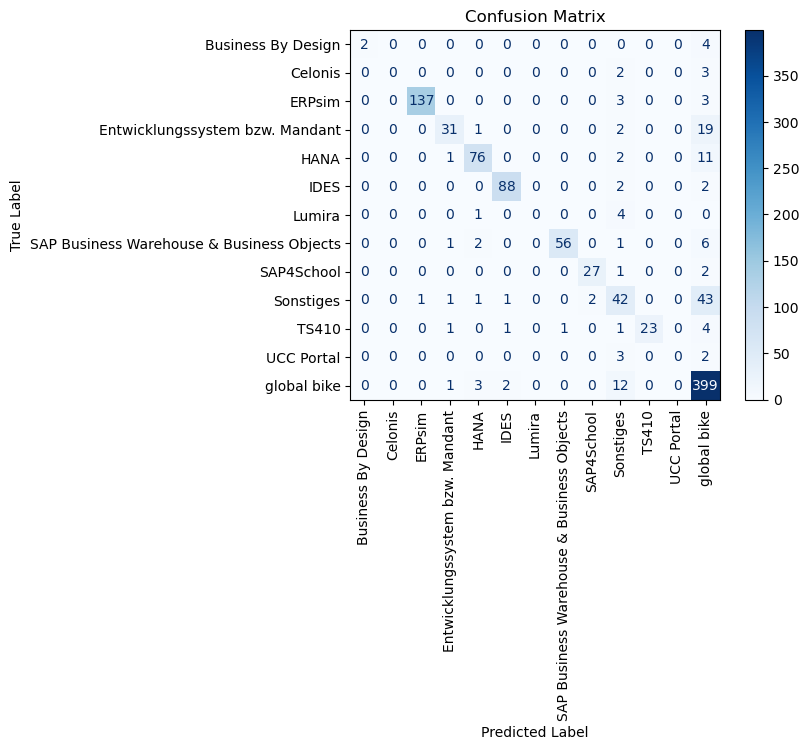

Metrics for SVC
Accuracy: 0.8974854932301741
Precision: 0.9022224867984655
Recall: 0.8974854932301741
F1-Score: 0.8973463986695194
Biggest error betwenen: 9 and 12


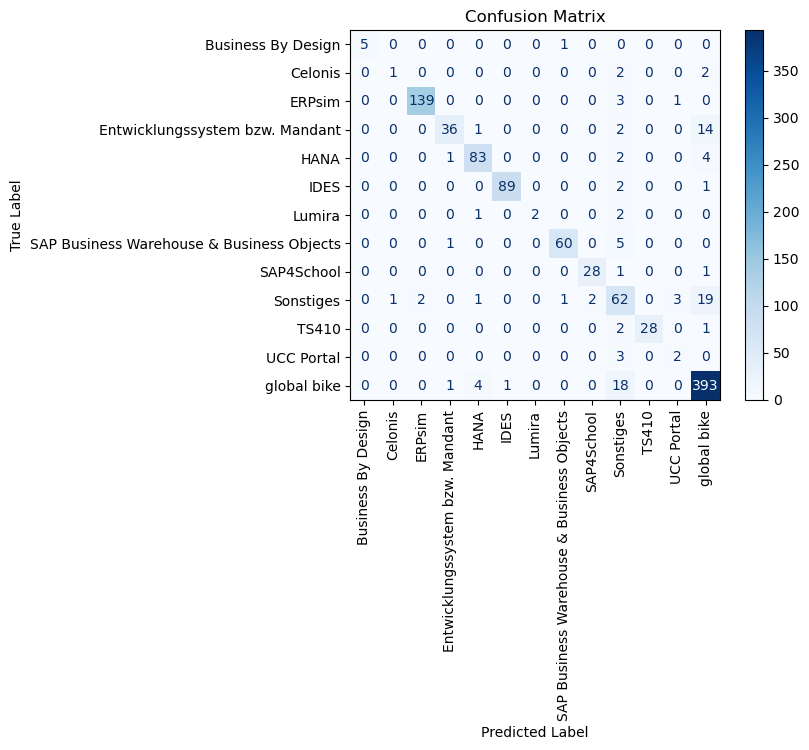

Metrics for KNeighborsClassifier
Accuracy: 0.8858800773694391
Precision: 0.8873702044330335
Recall: 0.8858800773694391
F1-Score: 0.8845291969593587
Biggest error betwenen: 9 and 12


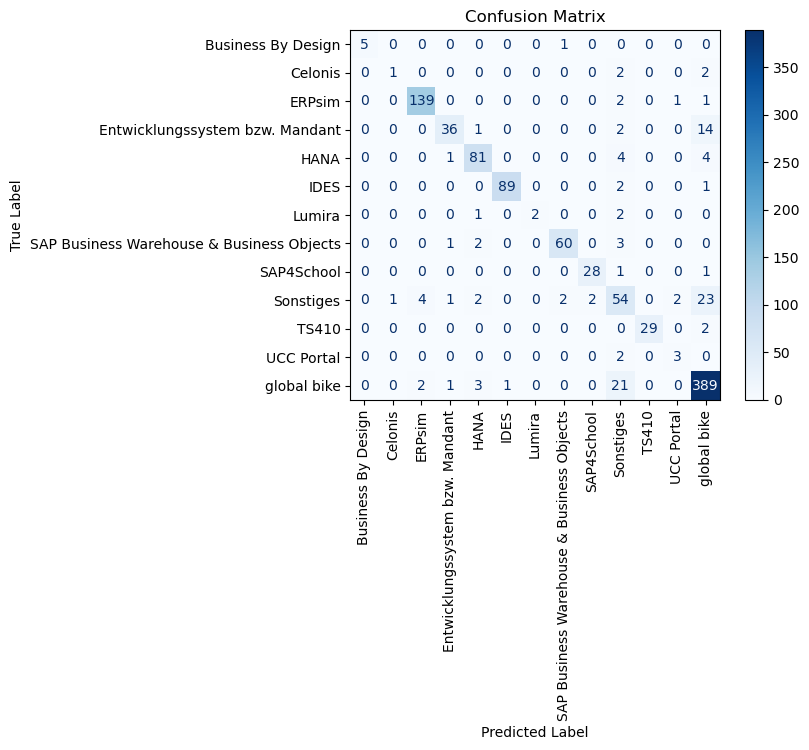

In [38]:
# BERT Implementation
y_col_key = 'Produkt Label (Merged)'

classification_description = 'BERT'

x_train, x_test, y_train, y_test = encode_data_BERT(tickets, categorical_columns, y_col_key, 0.2)

print('Number training samples:', len(y_train))
print('Number test samples:', len(y_test))

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
classify_with_metrics(rf_classifier, x_train, y_train, x_test, y_test, classification_description)

# SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 1) # I tried all and linear is best
classify_with_metrics(svm_classifier, x_train, y_train, x_test, y_test, classification_description)

# Naive Bayes classifier
# nb_classifier = MultinomialNB()
# classify_with_metrics(nb_classifier, x_train, y_train, x_test, y_test, classification_description)

# LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# for not converging when kept at 100
# Logistic Regression classifier
# logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
# classify_with_metrics(logreg_classifier, x_train, y_train, x_test, y_test, classification_description)

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
classify_with_metrics(knn_classifier, x_train, y_train, x_test, y_test, classification_description)

# LSW: I want to see a Perceptron Approach
# sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
# classify_with_metrics(sgd_classifier, x_train, y_train, x_test, y_test, classification_description)

Number training samples: 4132
Number test samples: 1034
Metrics for RandomForestClassifier
Accuracy: 0.8820116054158608
Precision: 0.8829065433036287
Recall: 0.8820116054158608
F1-Score: 0.8785302913383879
Biggest error betwenen: 9 and 12


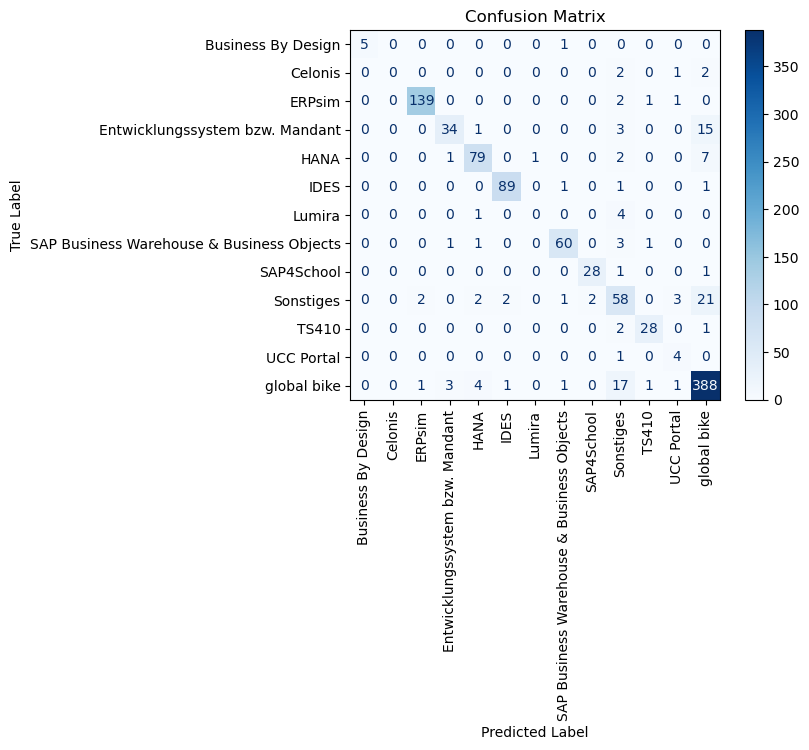

Metrics for SVC
Accuracy: 0.902321083172147
Precision: 0.9065357011670966
Recall: 0.902321083172147
F1-Score: 0.9001025277373389
Biggest error betwenen: 9 and 12


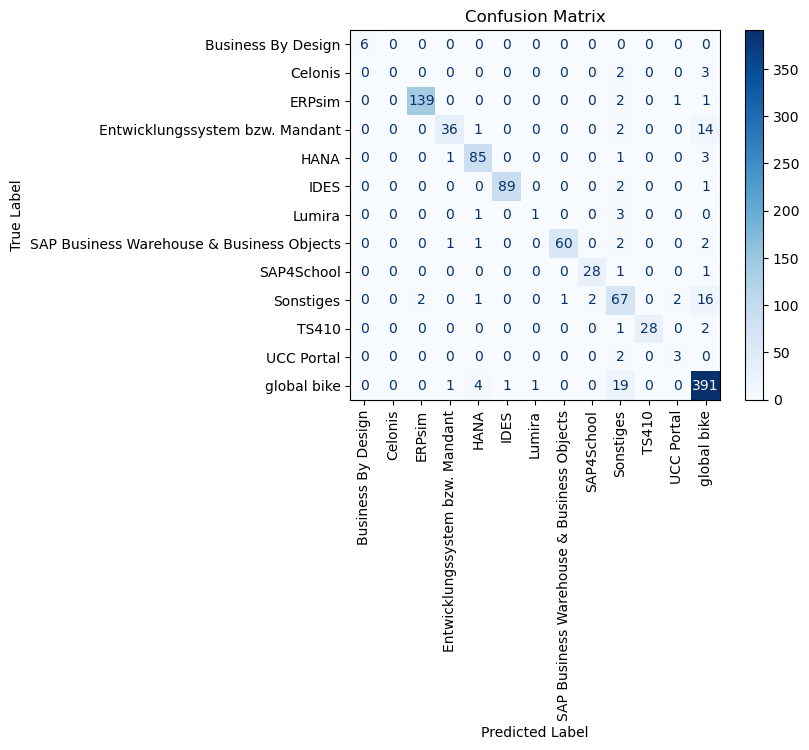

Metrics for MultinomialNB
Accuracy: 0.8926499032882012
Precision: 0.9153021496968824
Recall: 0.8926499032882012
F1-Score: 0.8921876850287928
Biggest error betwenen: 3 and 12


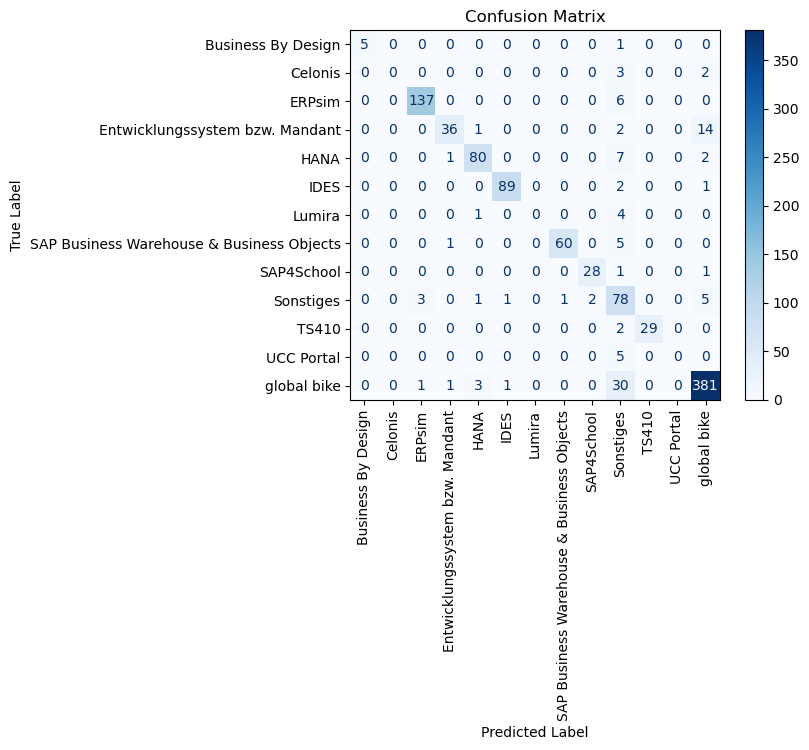

Metrics for LogisticRegression
Accuracy: 0.8965183752417795
Precision: 0.903545745280589
Recall: 0.8965183752417795
F1-Score: 0.8933882563100675
Biggest error betwenen: 9 and 12


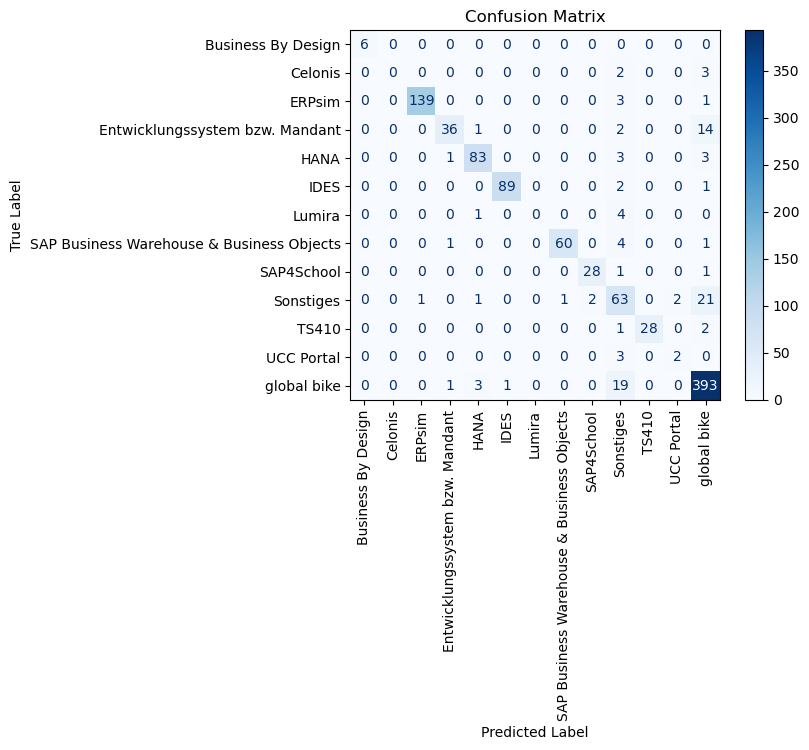

Metrics for KNeighborsClassifier
Accuracy: 0.8810444874274661
Precision: 0.8796822551976881
Recall: 0.8810444874274661
F1-Score: 0.8761349484728359
Biggest error betwenen: 9 and 12


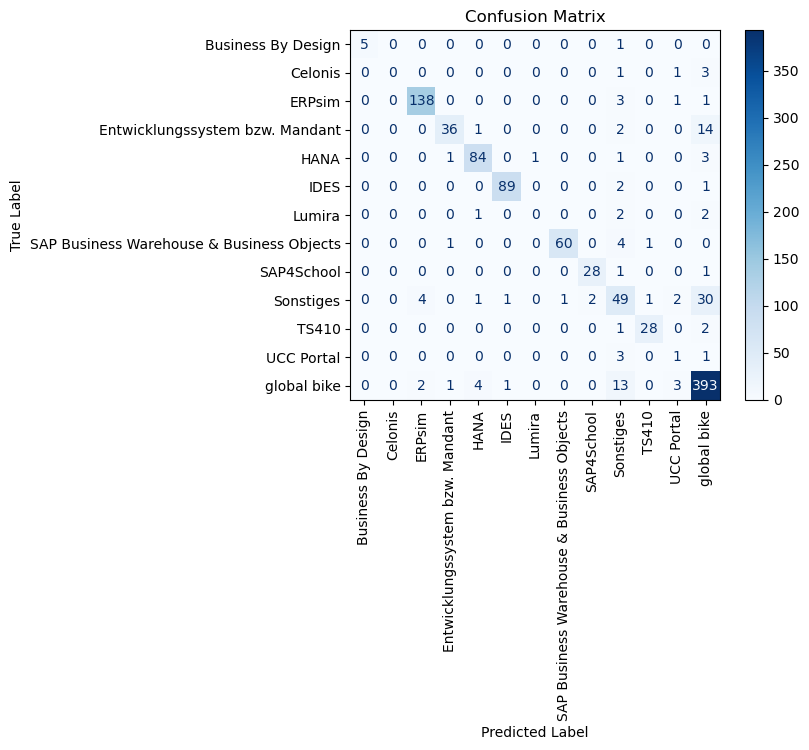

In [39]:
# Default GBI/GBL merged
y_col_key = 'Produkt Label (Merged)'

classification_description = 'merged_bike'

x_train, x_test, y_train, y_test = get_single_label_data(tickets, categorical_columns, y_col_key, 0.2)

print('Number training samples:', len(y_train))
print('Number test samples:', len(y_test))

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
classify_with_metrics(rf_classifier, x_train, y_train, x_test, y_test, classification_description)

# SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 1) # I tried all and linear is best
classify_with_metrics(svm_classifier, x_train, y_train, x_test, y_test, classification_description)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
classify_with_metrics(nb_classifier, x_train, y_train, x_test, y_test, classification_description)

# LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# for not converging when kept at 100
# Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
classify_with_metrics(logreg_classifier, x_train, y_train, x_test, y_test, classification_description)

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
classify_with_metrics(knn_classifier, x_train, y_train, x_test, y_test, classification_description)

# LSW: I want to see a Perceptron Approach
# sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
# classify_with_metrics(sgd_classifier, x_train, y_train, x_test, y_test, classification_description)

Number training samples: 1652
Number test samples: 413
Metrics for RandomForestClassifier
Accuracy: 0.8111380145278451
Precision: 0.8012881164902025
Recall: 0.8111380145278451
F1-Score: 0.8050738622789694
Biggest error betwenen: 0 and 1


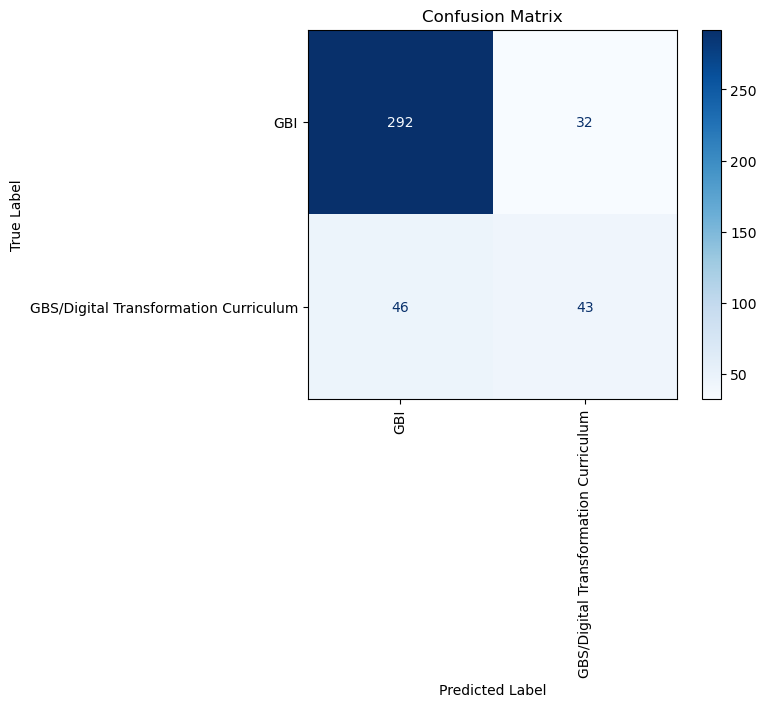

Metrics for SVC
Accuracy: 0.8062953995157385
Precision: 0.8017121534785411
Recall: 0.8062953995157385
F1-Score: 0.8038053841158714
Biggest error betwenen: 0 and 1


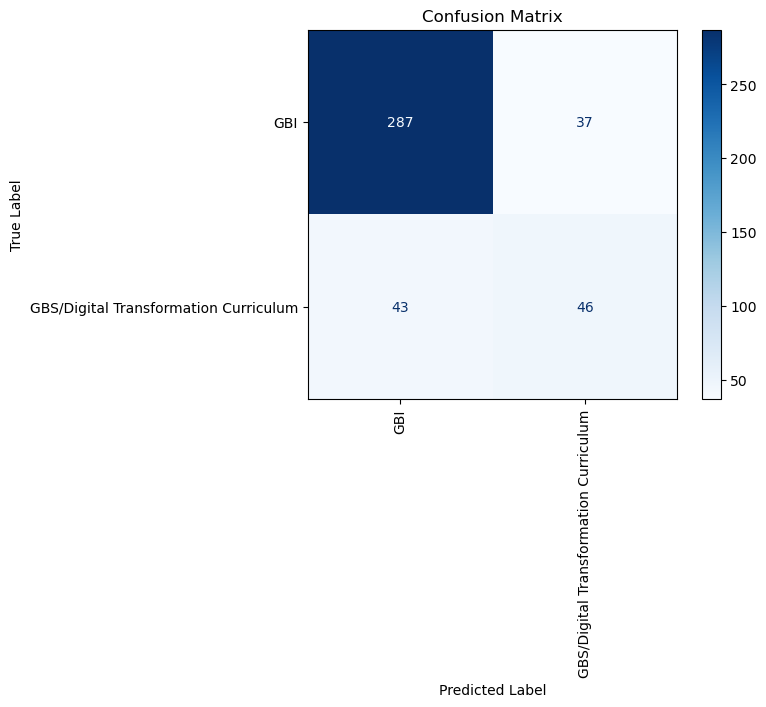

Metrics for MultinomialNB
Accuracy: 0.7699757869249395
Precision: 0.8345966072061372
Recall: 0.7699757869249395
F1-Score: 0.7870867554446463
Biggest error betwenen: 0 and 1


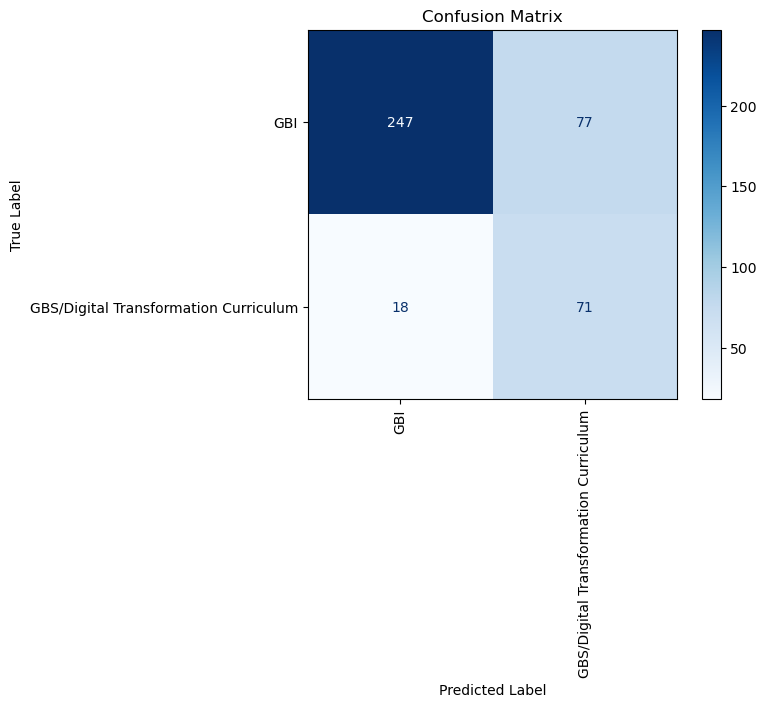

Metrics for LogisticRegression
Accuracy: 0.837772397094431
Precision: 0.8250847686268054
Recall: 0.837772397094431
F1-Score: 0.8254597413010568
Biggest error betwenen: 0 and 1


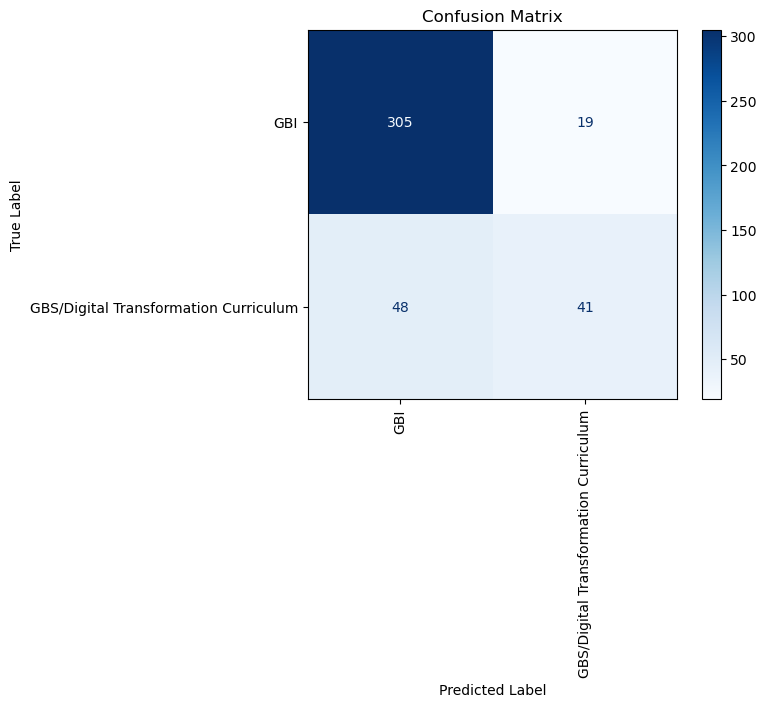

Metrics for KNeighborsClassifier
Accuracy: 0.7990314769975787
Precision: 0.7708790795810225
Recall: 0.7990314769975787
F1-Score: 0.7715579947005969
Biggest error betwenen: 0 and 1


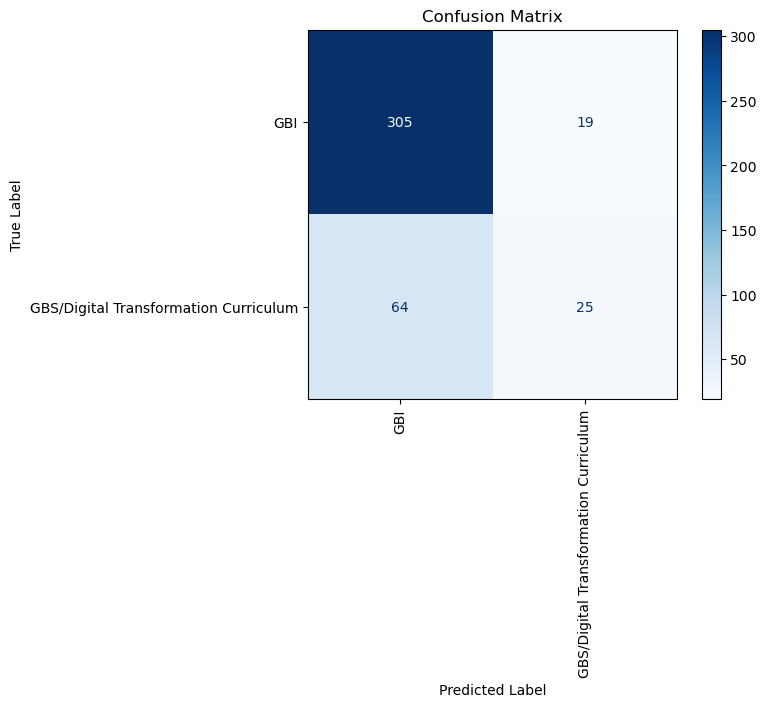

Metrics for SGDClassifier
Accuracy: 0.784503631961259
Precision: 0.8401445636732396
Recall: 0.784503631961259
F1-Score: 0.7996273393795115
Biggest error betwenen: 0 and 1


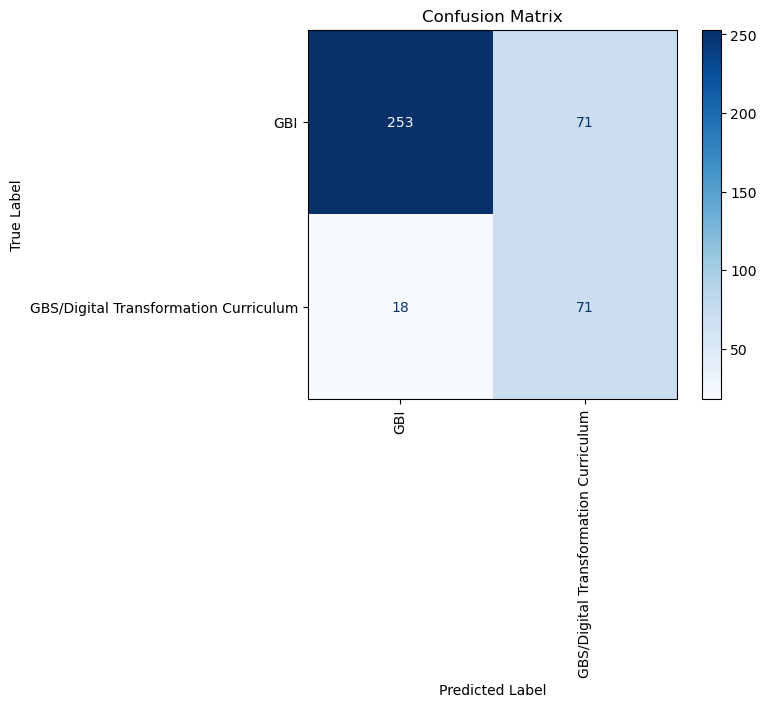

In [40]:
# Bike Internal Classification
bike_tickets = tickets[tickets['Produkt Label (Merged)'] == 'global bike']

y_col_key = 'Produkt Label'

x_train, x_test, y_train, y_test = get_single_label_data(bike_tickets, categorical_columns, y_col_key, 0.2)

classification_description = 'bike_internal'

print('Number training samples:', len(y_train))
print('Number test samples:', len(y_test))

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
classify_with_metrics(rf_classifier, x_train, y_train, x_test, y_test, classification_description)

# SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 1)
classify_with_metrics(svm_classifier, x_train, y_train, x_test, y_test, classification_description)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
classify_with_metrics(nb_classifier, x_train, y_train, x_test, y_test, classification_description)

# LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# for not converging when kept at 100
# Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
classify_with_metrics(logreg_classifier, x_train, y_train, x_test, y_test, classification_description)

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
classify_with_metrics(knn_classifier, x_train, y_train, x_test, y_test, classification_description)

# LSW: I want to see a Perceptron Approach
sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
classify_with_metrics(sgd_classifier, x_train, y_train, x_test, y_test, classification_description)

Number training samples: 696
Number test samples: 696
Metrics for RandomForestClassifier
Accuracy: 0.9037356321839081
Precision: 0.9124370896504718
Recall: 0.9037356321839081
F1-Score: 0.9045619232052127
Biggest error betwenen: 12 and 13


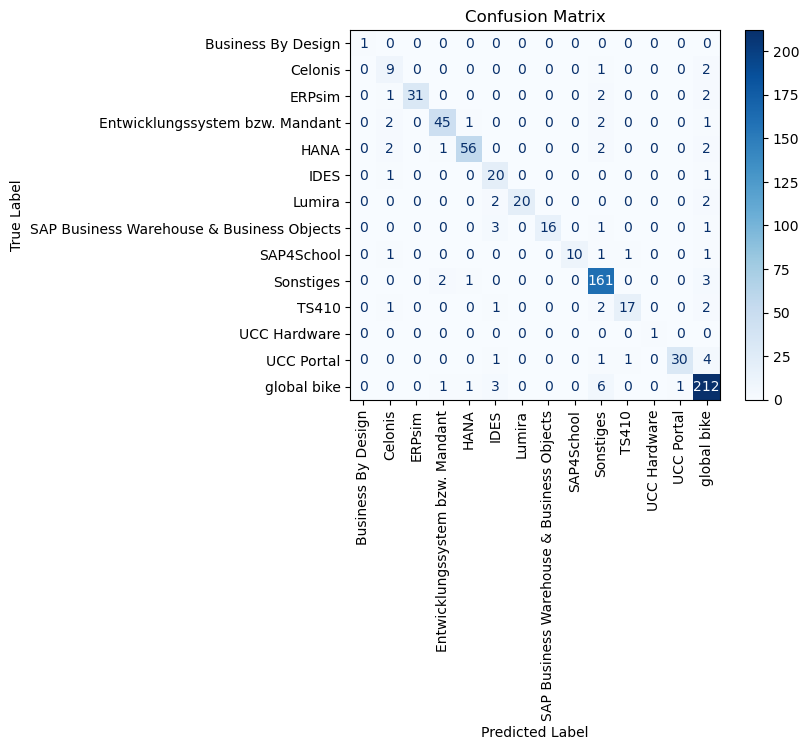

Metrics for SVC
Accuracy: 0.6135057471264368
Precision: 0.6538729276868108
Recall: 0.6135057471264368
F1-Score: 0.5875903245157695
Biggest error betwenen: 9 and 13


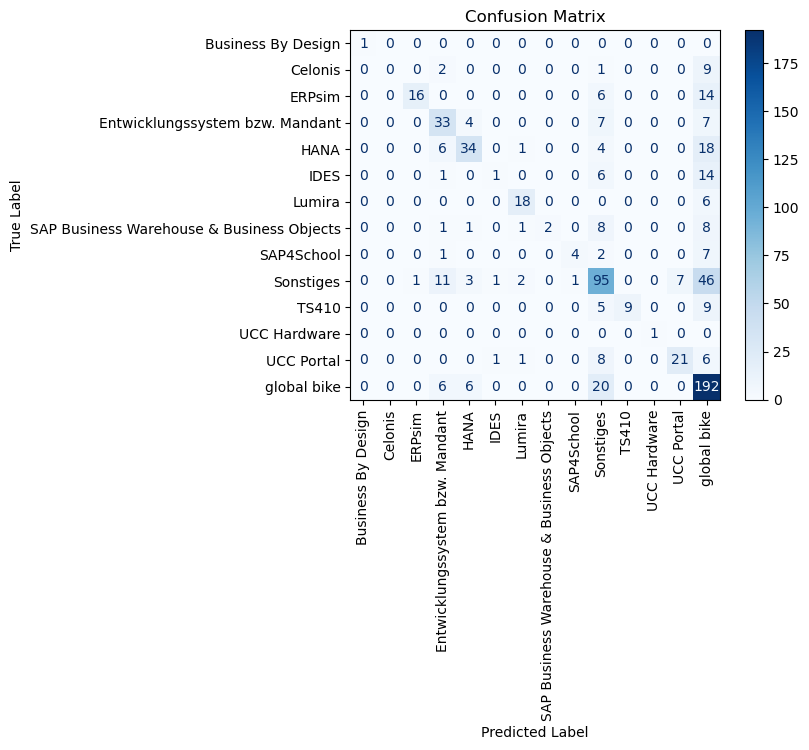

Metrics for MultinomialNB
Accuracy: 0.5172413793103449
Precision: 0.6133518147218225
Recall: 0.5172413793103449
F1-Score: 0.47211748006002113
Biggest error betwenen: 9 and 13


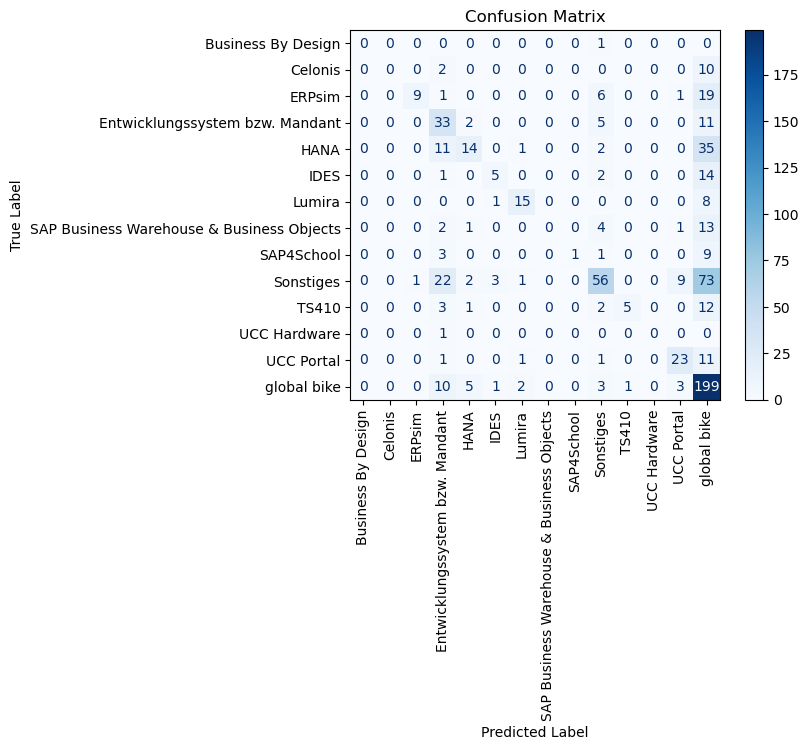

Metrics for LogisticRegression
Accuracy: 0.5962643678160919
Precision: 0.6425890295127065
Recall: 0.5962643678160919
F1-Score: 0.5597503523047597
Biggest error betwenen: 9 and 13


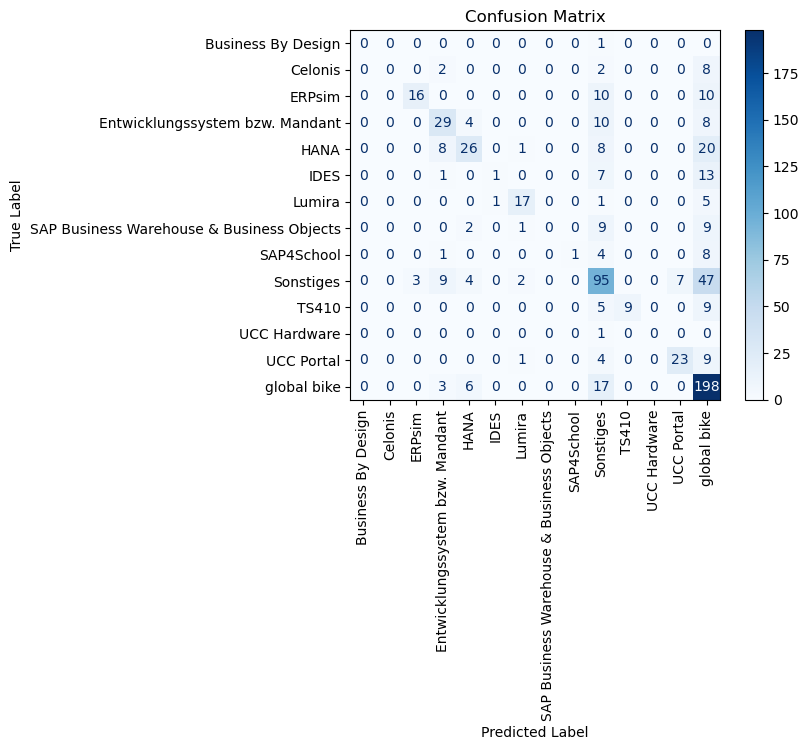

Metrics for KNeighborsClassifier
Accuracy: 0.5804597701149425
Precision: 0.5965711913946062
Recall: 0.5804597701149425
F1-Score: 0.5786078391803039
Biggest error betwenen: 9 and 13


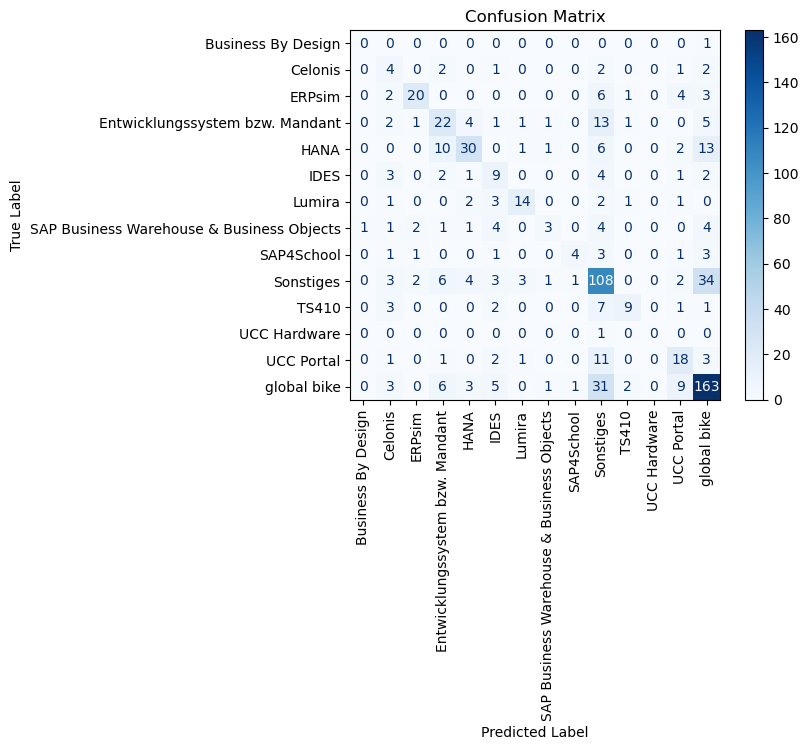

Metrics for SGDClassifier
Accuracy: 0.4985632183908046
Precision: 0.6058253021971243
Recall: 0.4985632183908046
F1-Score: 0.5040750150411516
Biggest error betwenen: 2 and 9


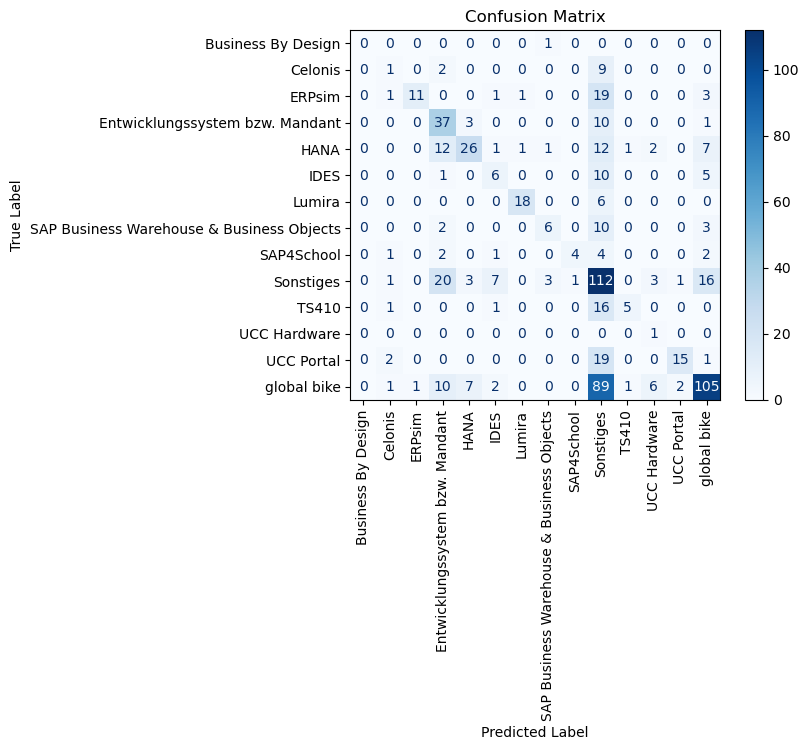

In [41]:
# Incorrectly Labelled Data only# Default GBI/GBL merged
single_incorrect_tickets = tickets[tickets['error_count'] > 0]
# single_incorrect_tickets = single_incorrect_tickets[['Text', 'Beschreibung', 'Kategorie ID', 'Unterkategorie ID', 'stemmed_text', 'stemmed_beschreibung', 'Produkt Label (Merged)', 'New Labels']]
# single_incorrect_tickets.head()
# single_incorrect_tickets.to_excel('~/Desktop/error_tickets.xlsx')

y_col_key = 'Produkt Label (Merged)'

x_train, x_test, y_train, y_test = get_single_label_data(single_incorrect_tickets, categorical_columns, y_col_key, 0)

classification_description = 'merged_bike_incorrect_labels_only'

print('Number training samples:', len(y_train))
print('Number test samples:', len(y_test))

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
classify_with_metrics(rf_classifier, x_train, y_train, x_test, y_test, classification_description)

# SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 1)
classify_with_metrics(svm_classifier, x_train, y_train, x_test, y_test, classification_description)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
classify_with_metrics(nb_classifier, x_train, y_train, x_test, y_test, classification_description)

# LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# for not converging when kept at 100
# Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
classify_with_metrics(logreg_classifier, x_train, y_train, x_test, y_test, classification_description)

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
classify_with_metrics(knn_classifier, x_train, y_train, x_test, y_test, classification_description)

# LSW: I want to see a Perceptron Approach
sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
classify_with_metrics(sgd_classifier, x_train, y_train, x_test, y_test, classification_description)

/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for Multi Label RandomForestClassifier
ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS
Accuracy: 0.9042553191489362
Precision: 0.9830907839309565
Recall: 0.9253981559094719
F1-Score: 0.9490001118345537


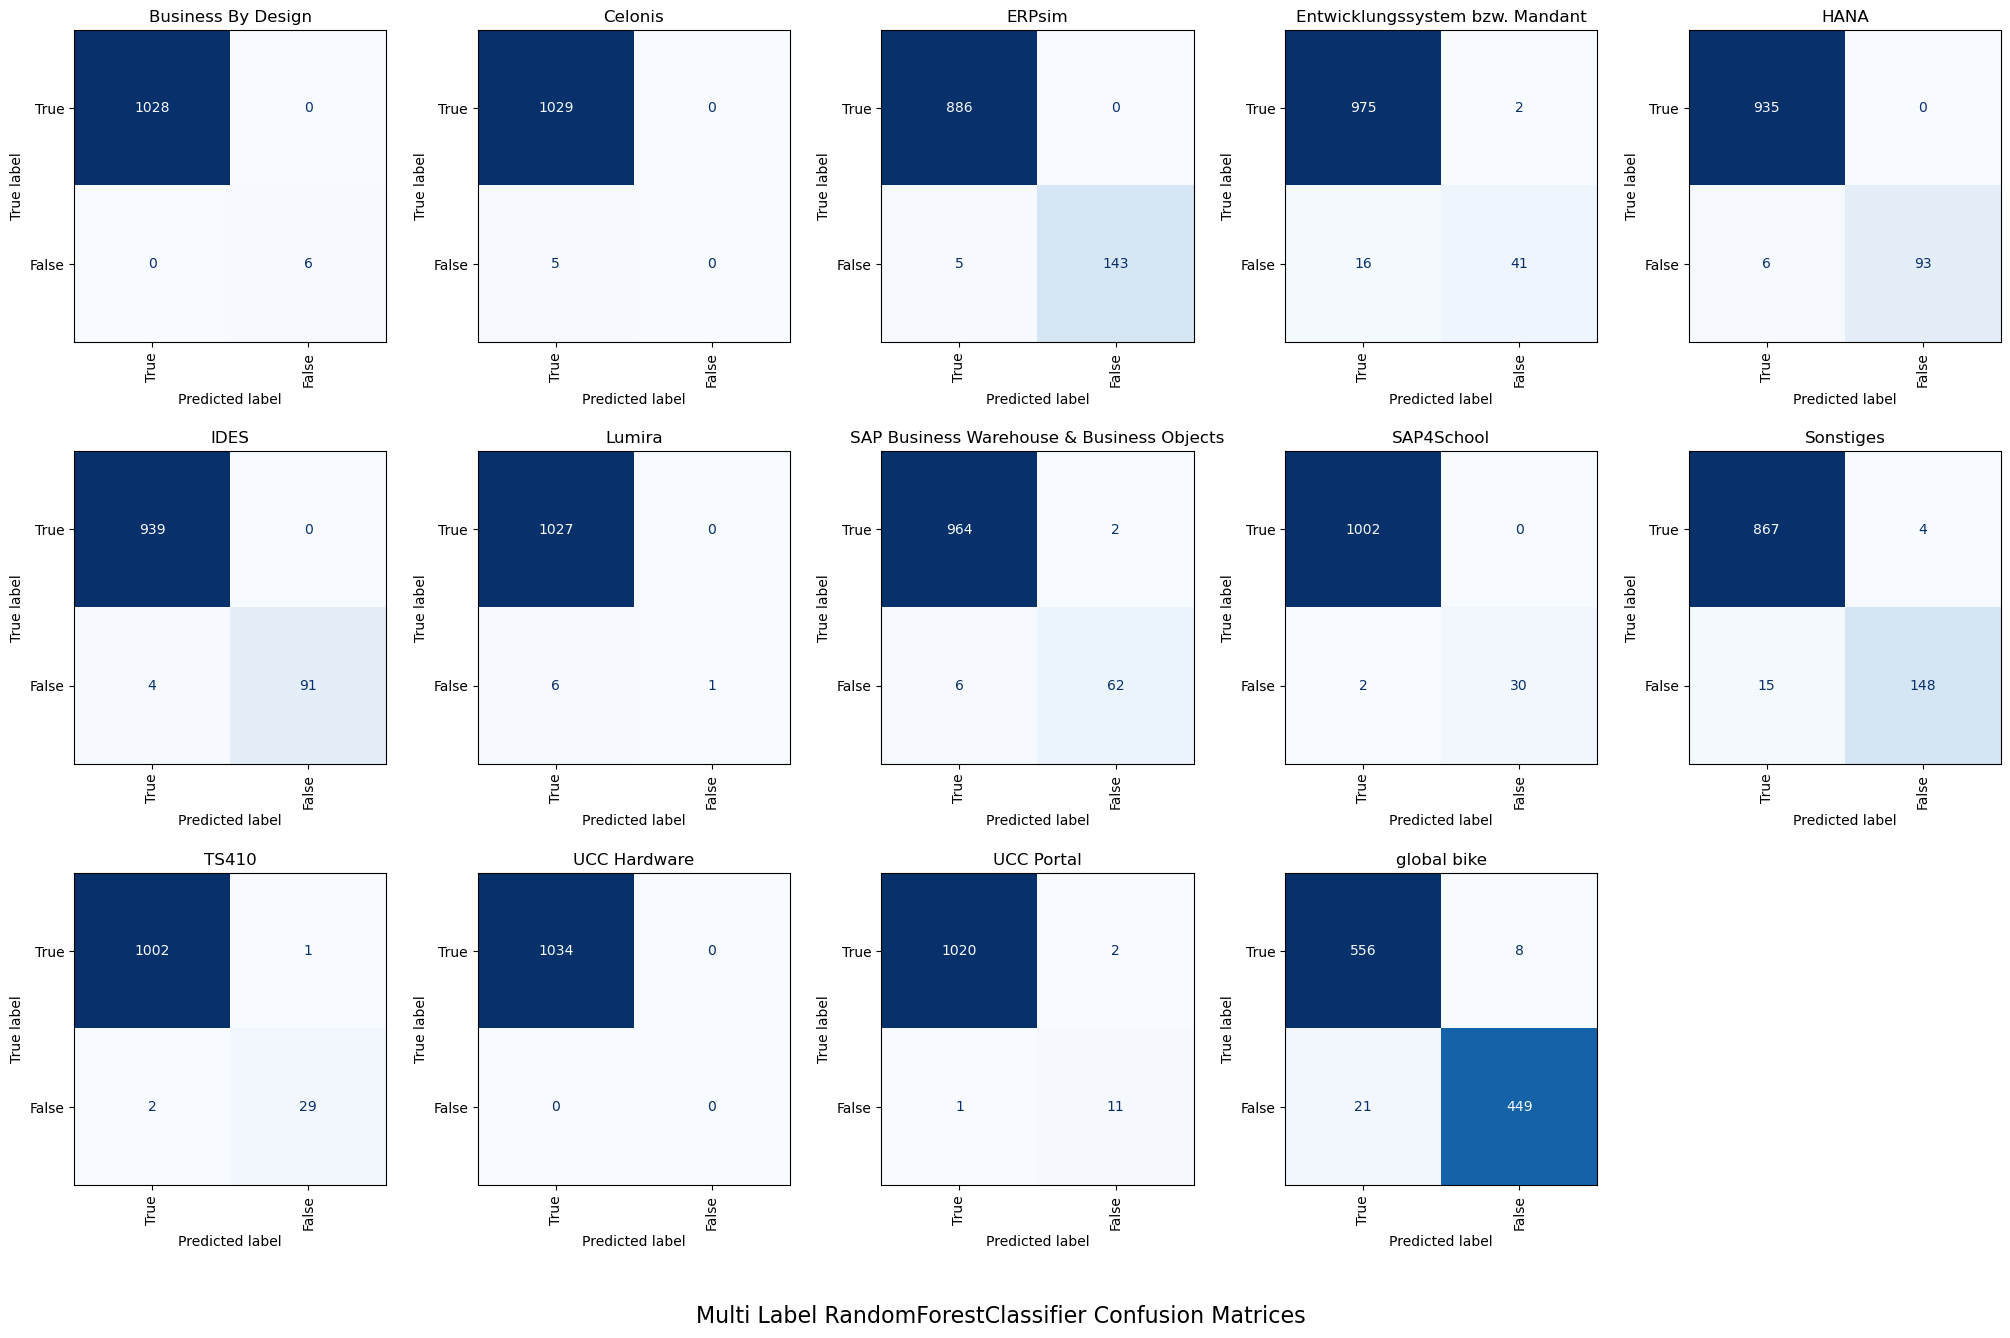

/n


/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for Multi Label SVC
ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS
Accuracy: 0.8858800773694391
Precision: 0.9787971387679782
Recall: 0.9086336965632859
F1-Score: 0.9392157635341827


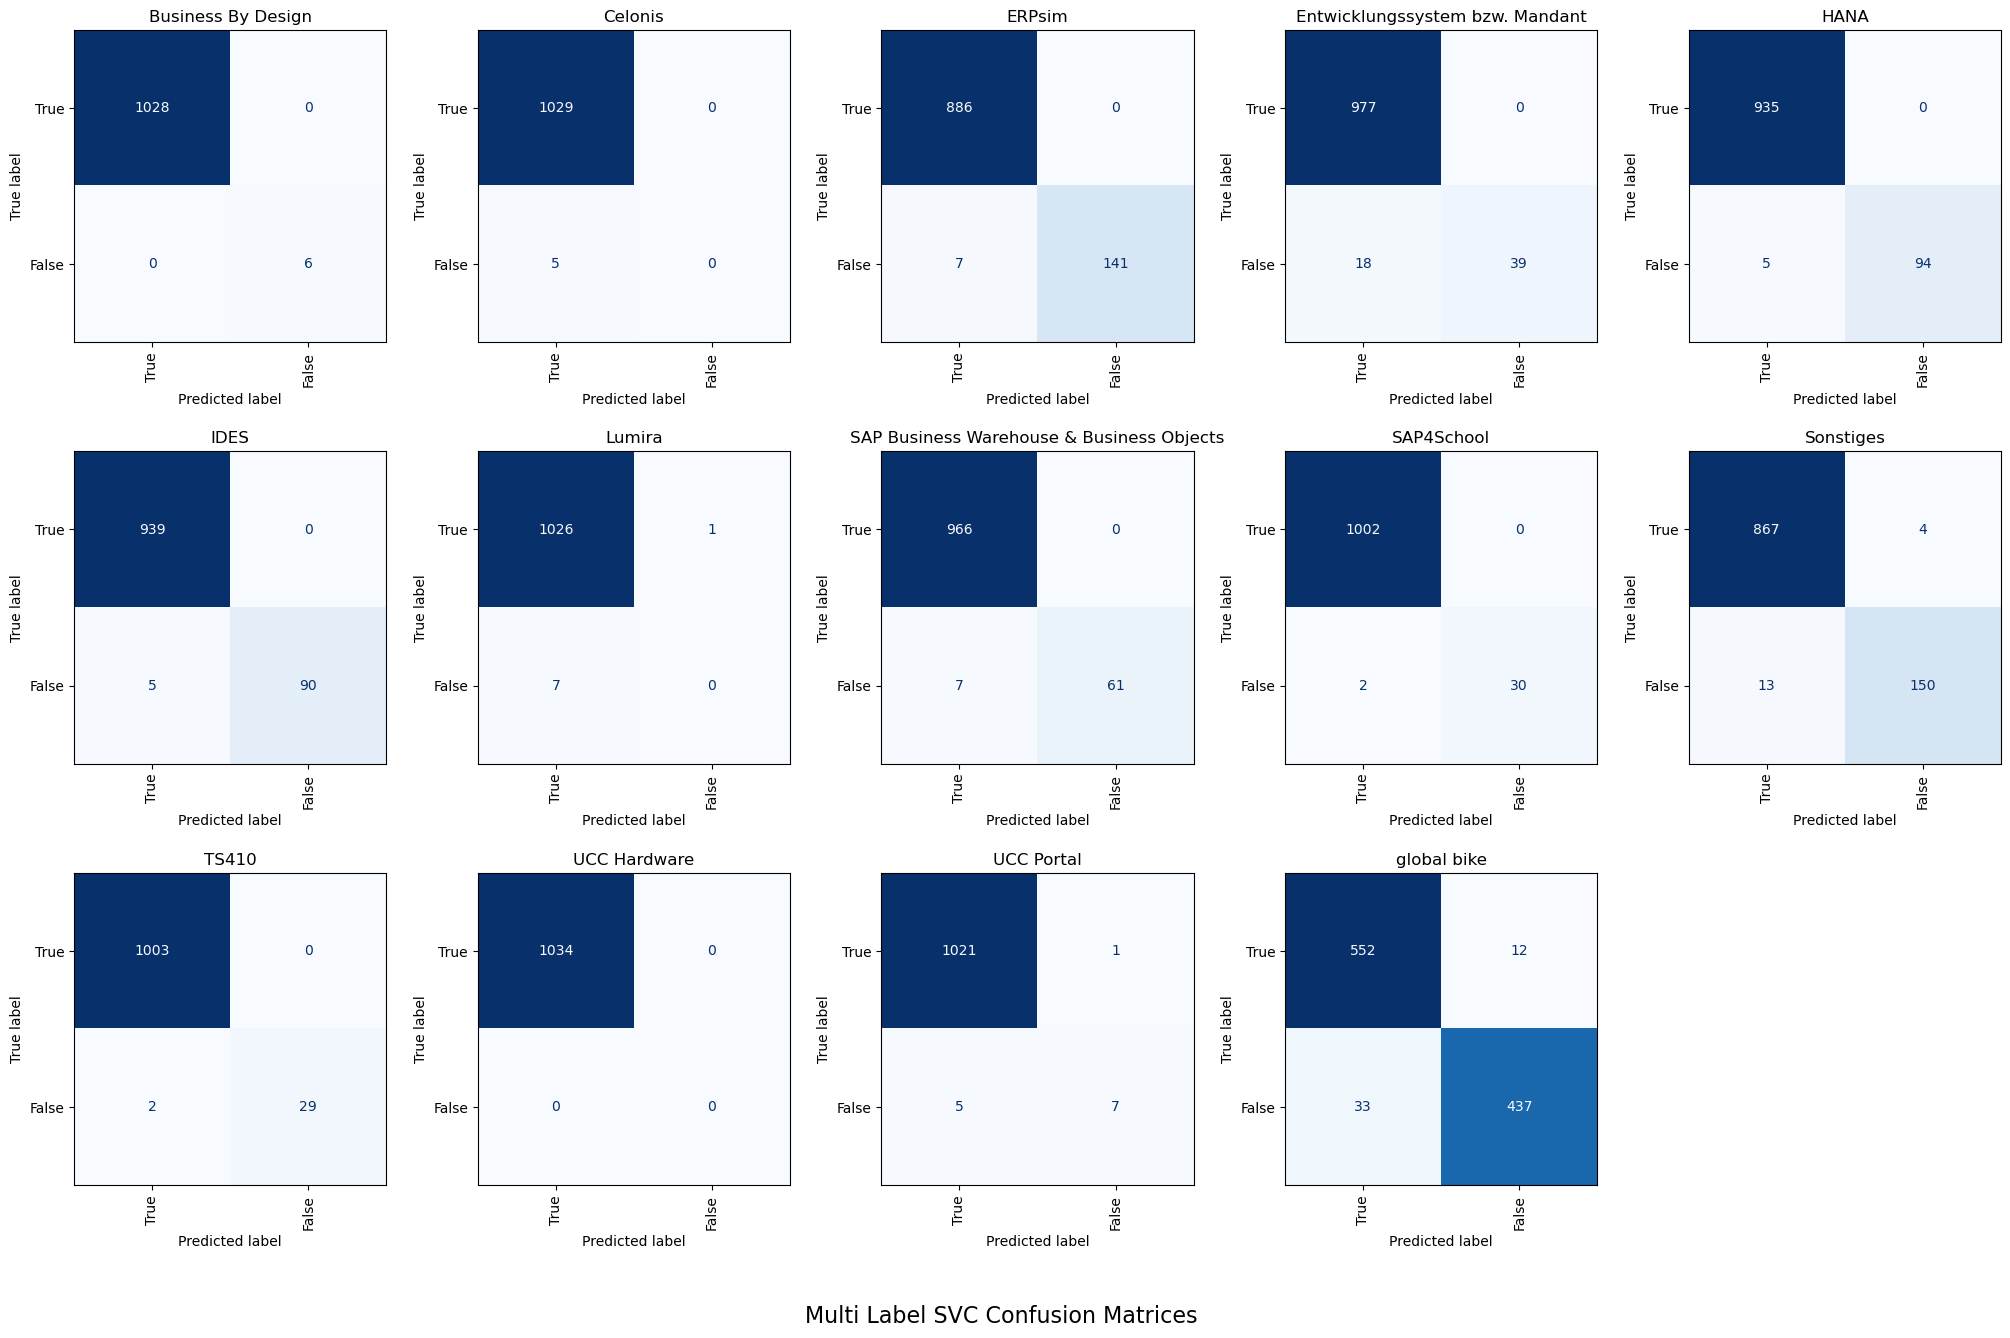

/n
Metrics for Multi Label MultinomialNB
ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS
Accuracy: 0.8762088974854932
Precision: 0.9664506481028551
Recall: 0.90360435875943
F1-Score: 0.9309823010704709


/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


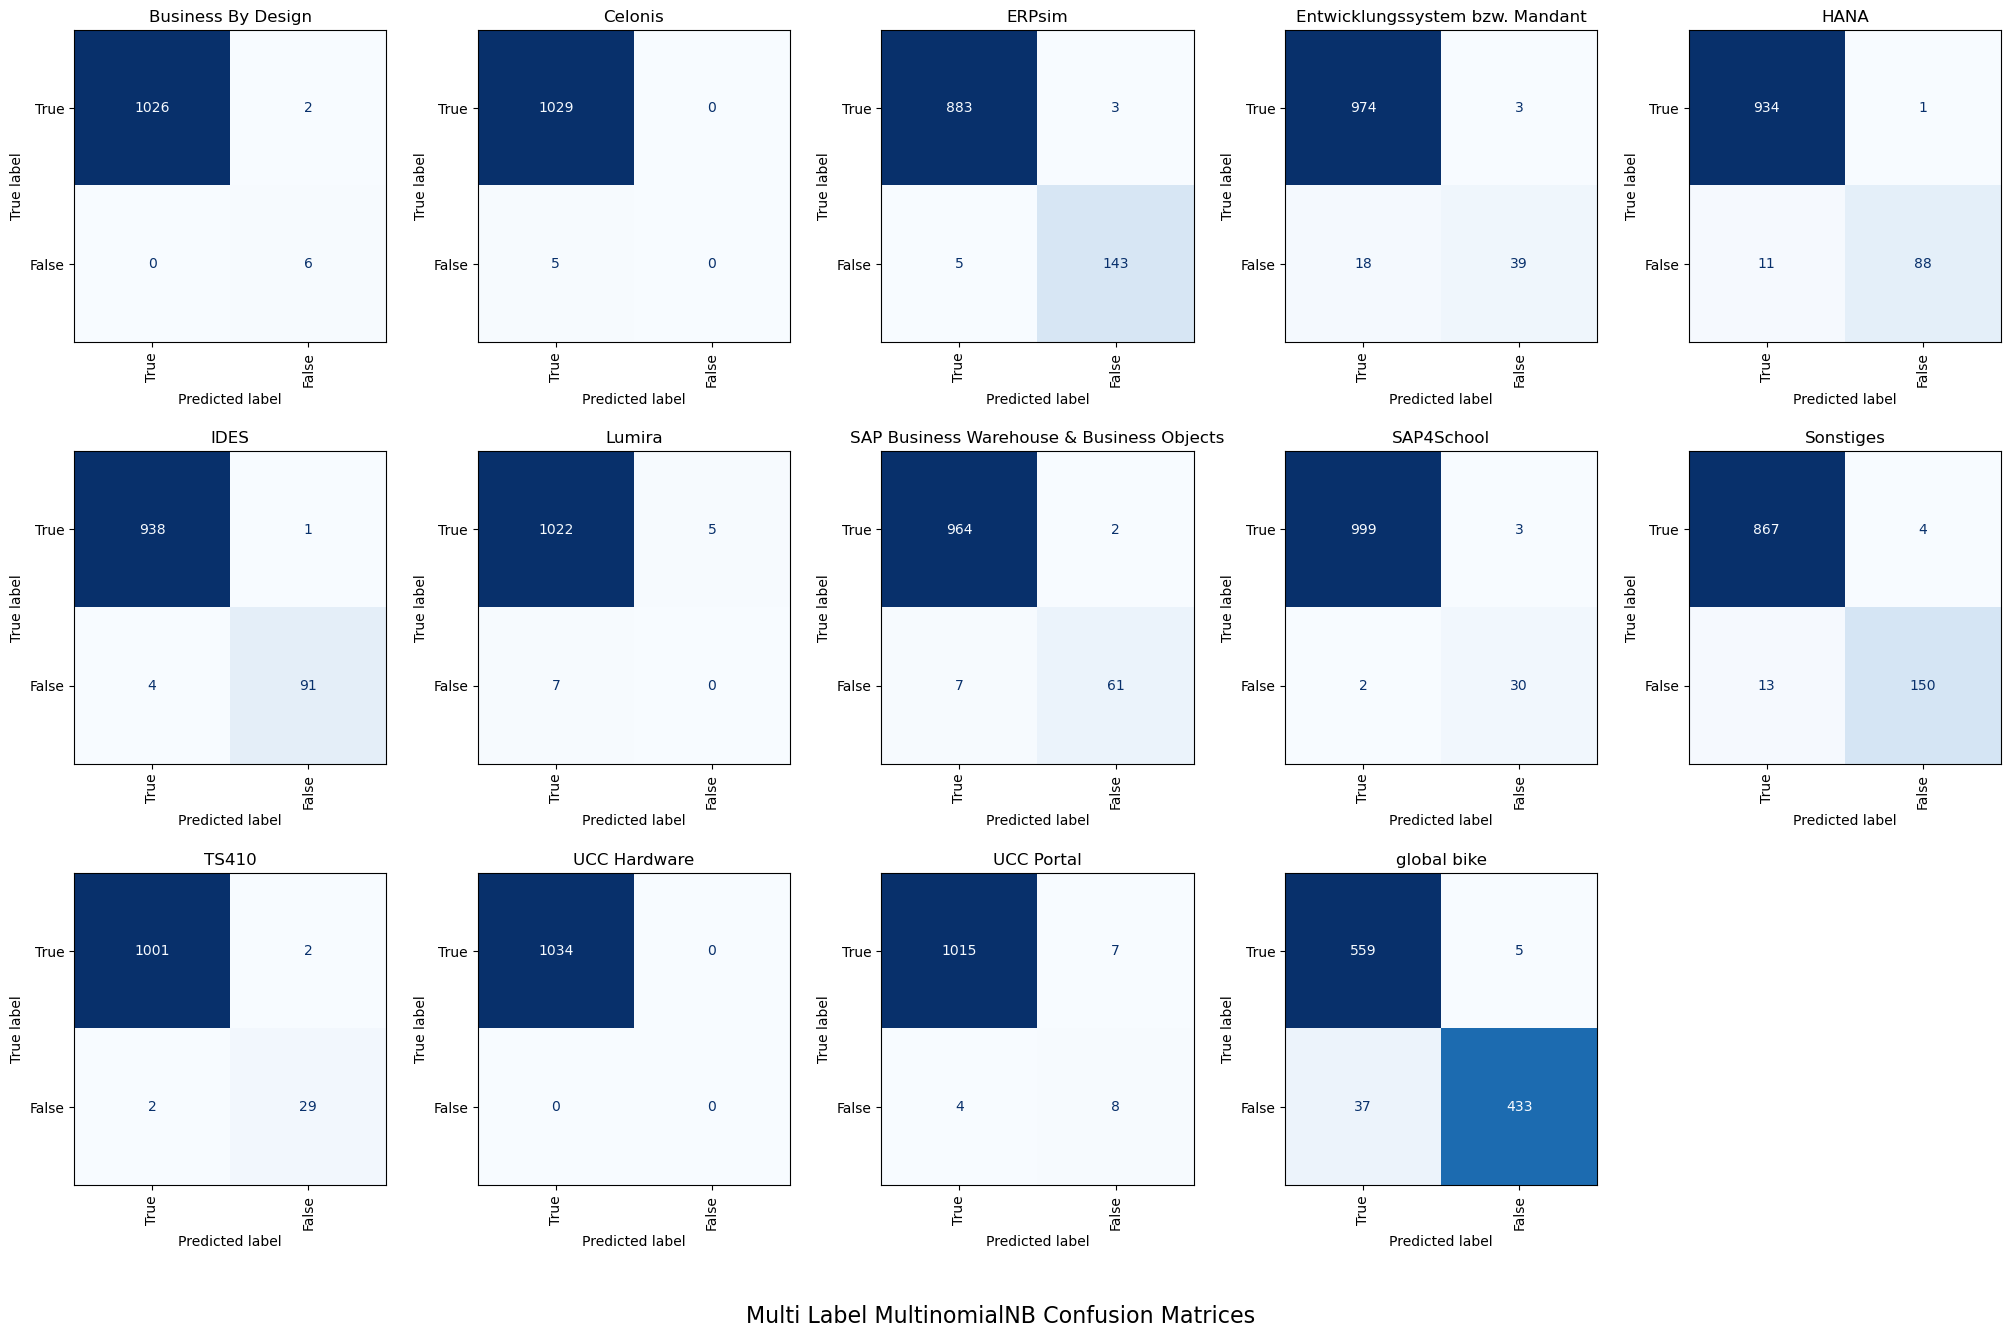

/n
Metrics for Multi Label LogisticRegression
ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS
Accuracy: 0.8907156673114119
Precision: 0.9873261986687824
Recall: 0.9061190276613579
F1-Score: 0.9390521063859273


/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


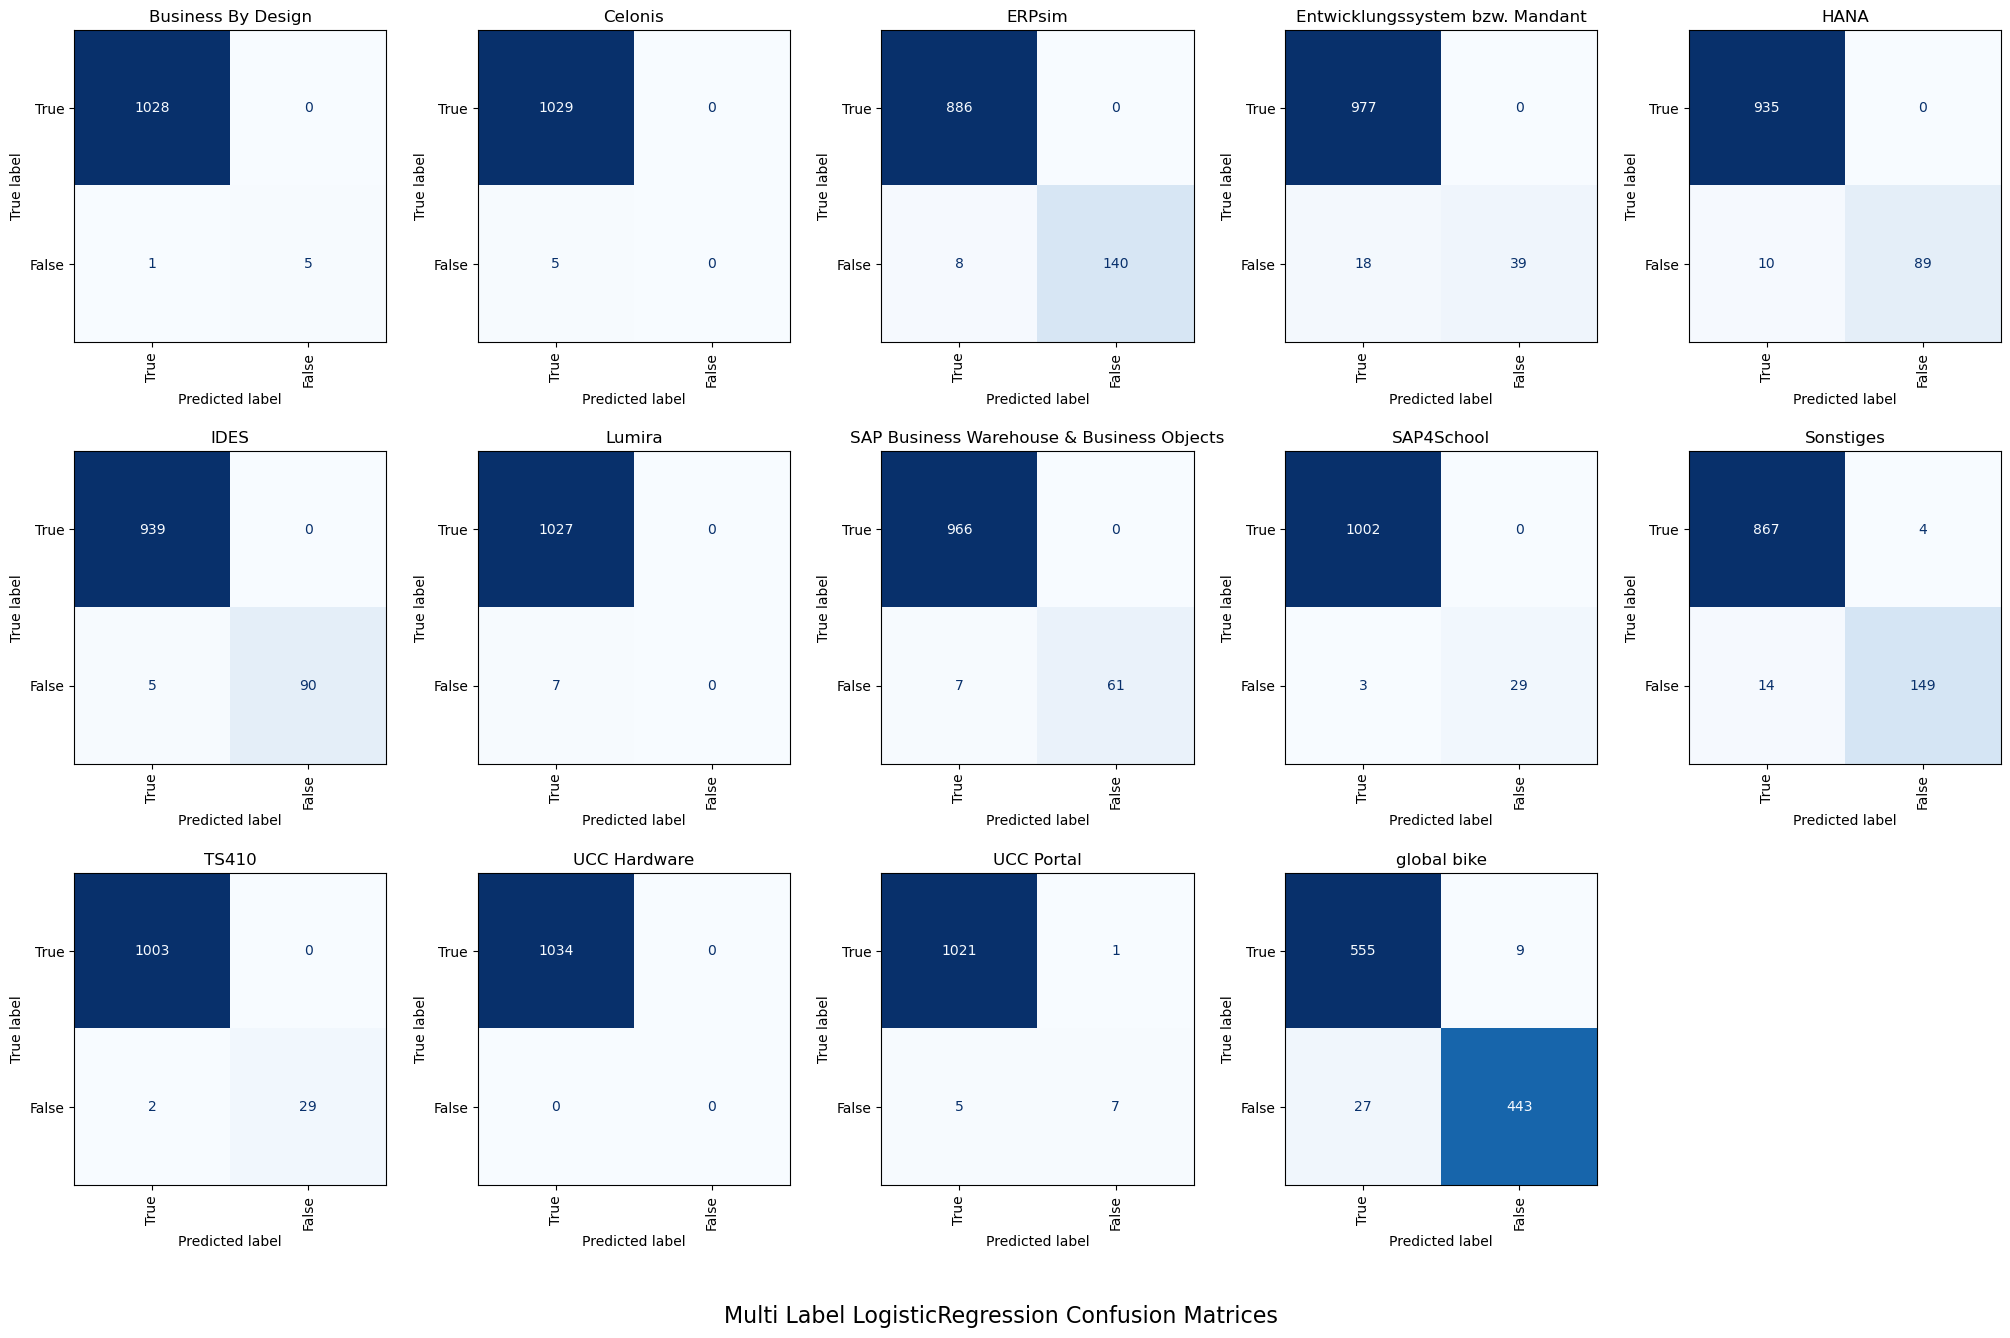

/n


/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics for Multi Label KNeighborsClassifier
ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS
Accuracy: 0.8974854932301741
Precision: 0.974711582070246
Recall: 0.9245599329421627
F1-Score: 0.9448343449147891


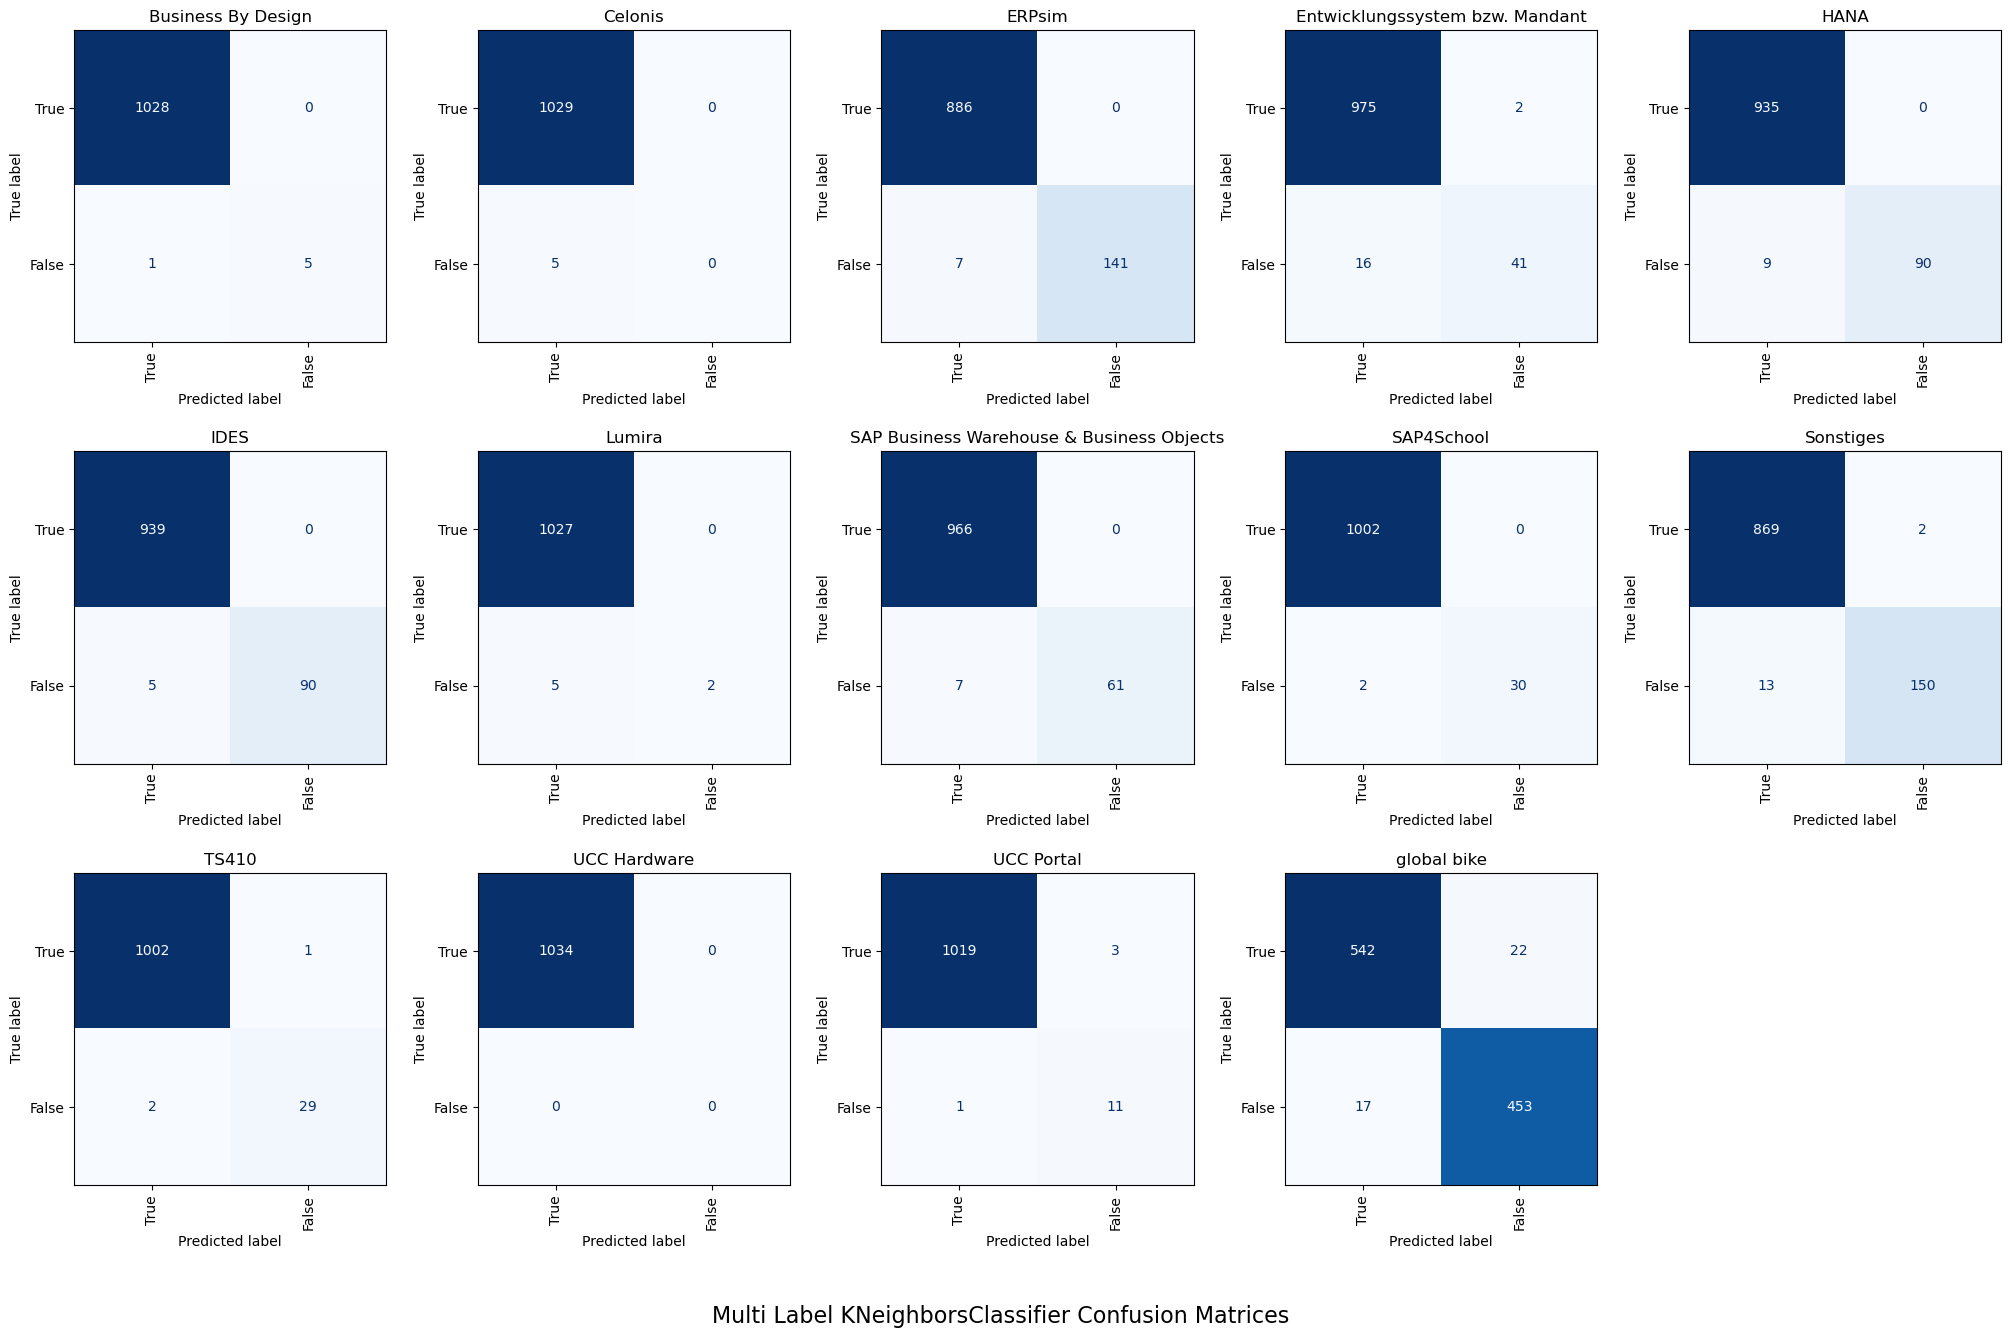

/n
Metrics for Multi Label SGDClassifier
ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS
Accuracy: 0.8433268858800773
Precision: 0.9284179047843167
Recall: 0.9128248113998324
F1-Score: 0.9198658077018842


/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lsw/miniconda3/envs/ucc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


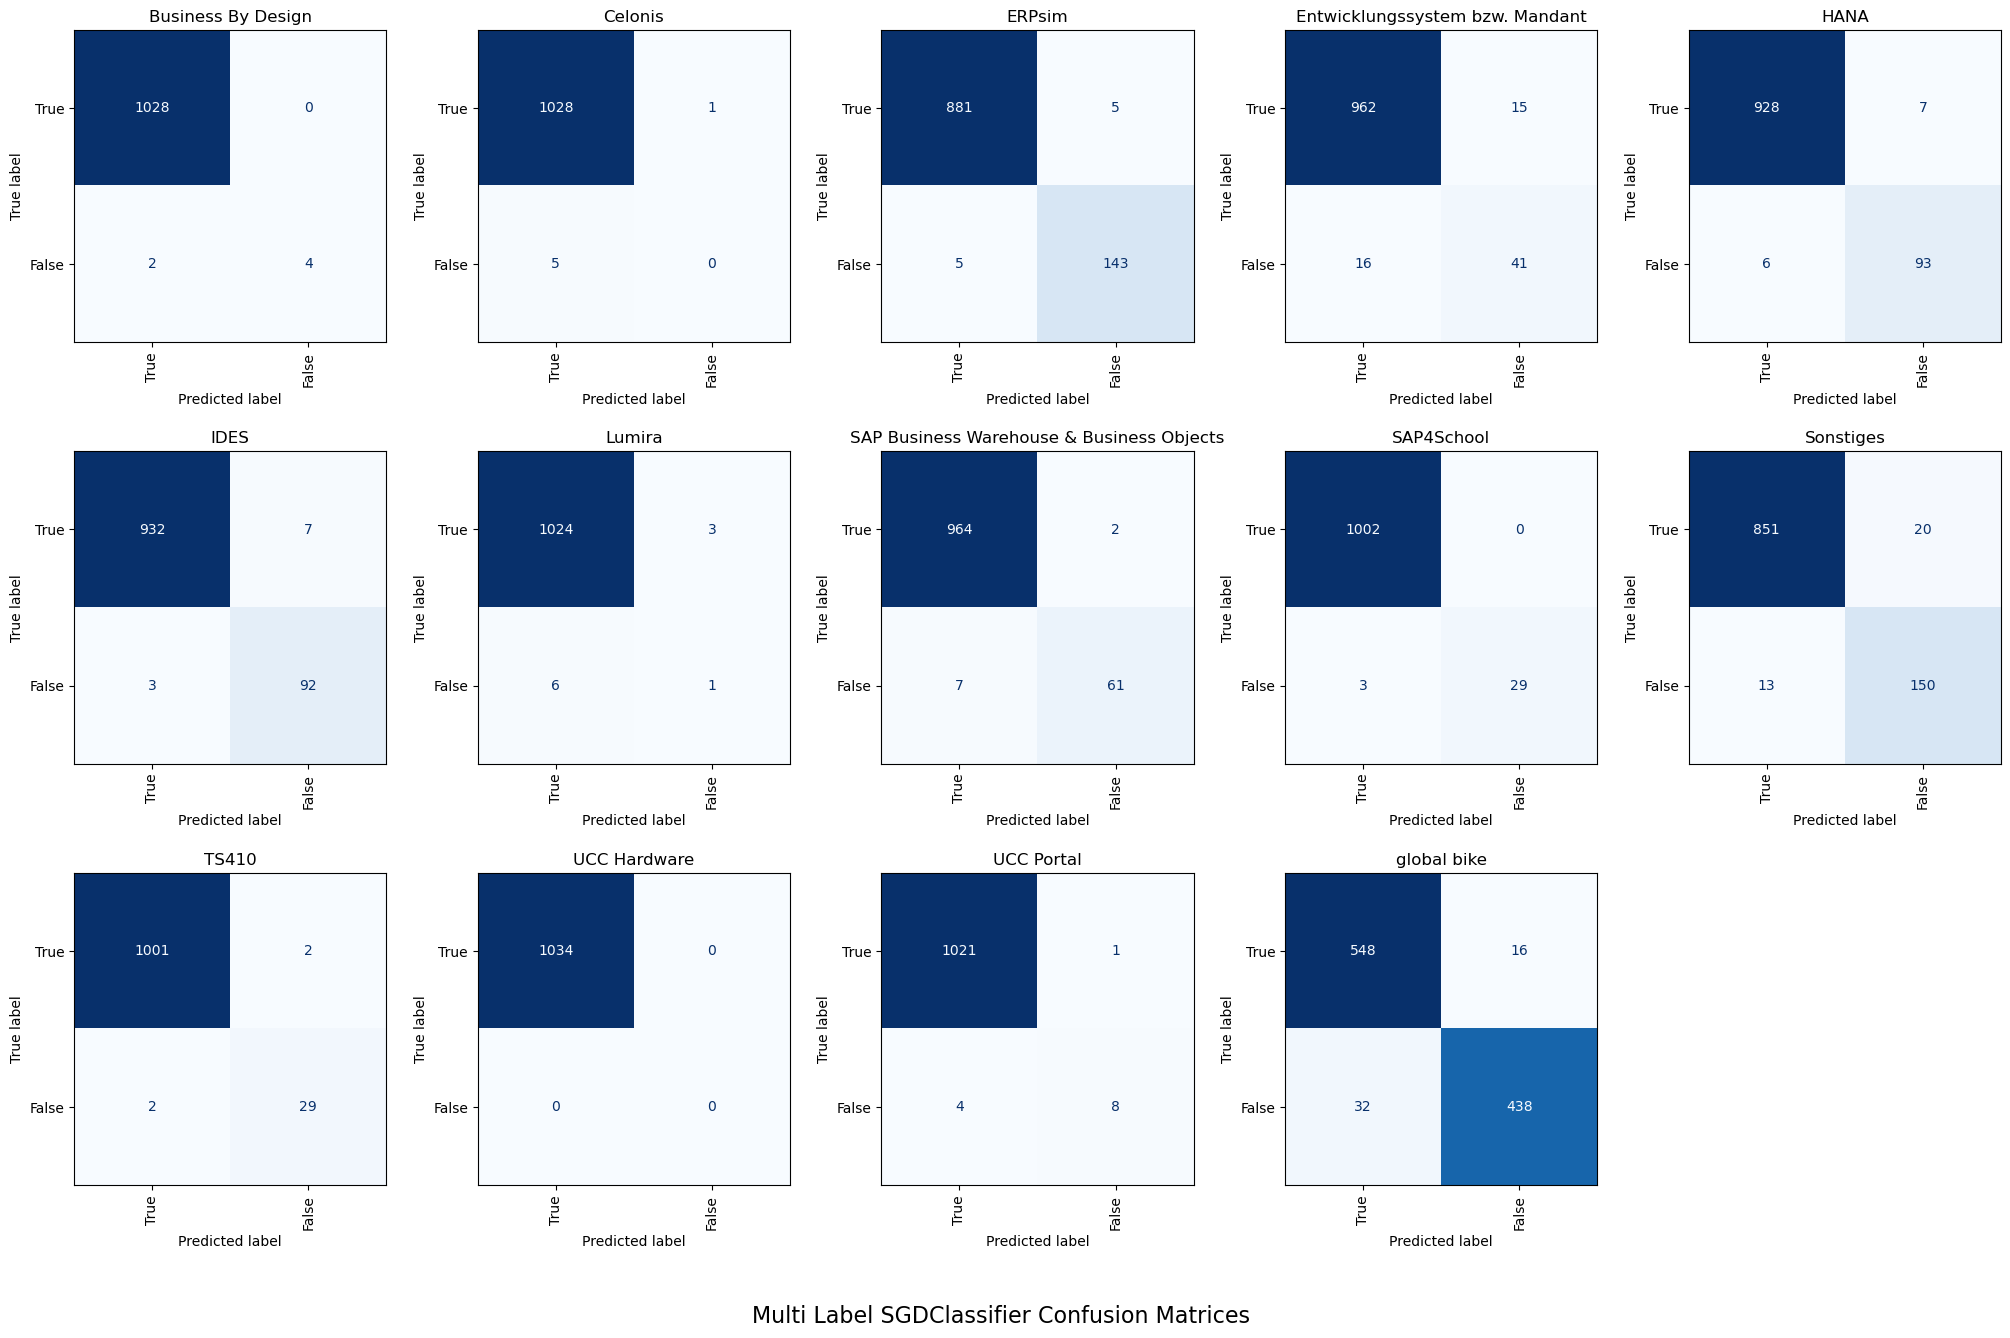

/n


In [42]:
labels = tickets['New Labels'].map(lambda labels_str: labels_str.split(','))

# classes = list(set(tickets['Produkt Label (Merged)']))
multi_binarizer = MultiLabelBinarizer()
multi_binarizer.fit(labels)

def get_multi_label_data(test_size = 0.2):
    x_train_raw, x_test_raw, y_train, y_test = train_test_split(
        tickets[['stemmed_text', 'stemmed_beschreibung'] + categorical_columns], # x
        labels, # y
        test_size = test_size,
        random_state = 1)

    y_train = multi_binarizer.transform(y_train)
    y_test = multi_binarizer.transform(y_test)

    # Tfidf vectorization for the training set
    # TEXT column
    tfidf_vectorizer_text = TfidfVectorizer(max_features = 30)
    tfidf_matrix_text_train = tfidf_vectorizer_text.fit_transform(x_train_raw['stemmed_text'].values.astype('U'))
    # DESCRIPTION column
    tfidf_vectorizer_description = TfidfVectorizer(max_features = 30)
    tfidf_matrix_description_train = tfidf_vectorizer_description.fit_transform(x_train_raw['stemmed_beschreibung'].values.astype('U'))
    # Combine the Tfidf train-matrices horizontally
    tfidf_matrix_combined_train = hstack((tfidf_matrix_text_train, tfidf_matrix_description_train))

    # Tfidf vectorization for the testing set
    # TEXT and DECRIPTION column
    tfidf_matrix_text_test = tfidf_vectorizer_text.transform(x_test_raw['stemmed_text'].values.astype('U'))
    tfidf_matrix_description_test = tfidf_vectorizer_description.transform(x_test_raw['stemmed_beschreibung'].values.astype('U'))
    # Combine the Tfidf test-matrices horizontally
    tfidf_matrix_combined_test = hstack((tfidf_matrix_text_test, tfidf_matrix_description_test))

    # 6b. Combining categorical and text data
    # One-hot encoding for categorical data
    encoder = OneHotEncoder(handle_unknown = 'ignore')
    encoded_data_train = encoder.fit_transform(x_train_raw[categorical_columns]).toarray()
    encoded_data_test = encoder.transform(x_test_raw[categorical_columns]).toarray()

    # Convert the one-hot encoded arrays to sparse matrices
    encoded_sparse_train = scipy.sparse.csr_matrix(encoded_data_train)
    encoded_sparse_test = scipy.sparse.csr_matrix(encoded_data_test)

    # Combine TF-IDF matrix and one hot encoded matrix horizontally for both training and testing sets
    x_train = hstack((tfidf_matrix_combined_train, encoded_sparse_train))
    x_test = hstack((tfidf_matrix_combined_test, encoded_sparse_test))

    return x_train, x_test, y_train, y_test

#print(final_matrix_train)

# Classification and evaluation in one method with different classifiers as parameter
def multiclassify_with_metrics(classifier, x_train, y_train, x_test, y_test):
    clf_name = 'Multi Label ' + classifier.__class__.__name__

    # Initializing and prediction
    multi_clf = MultiOutputClassifier(classifier).fit(x_train, y_train)
    y_pred = multi_clf.predict(x_test)
    
    # Performance evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average= 'weighted')
    f1_scr = f1_score(y_test, y_pred, average = 'weighted')
    
    # str_pred = multi_binarizer.inverse_transform(y_pred)
    # str_test = multi_binarizer.inverse_transform(y_test)
    # print(str_pred)
    # print(str_test)

    conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

    # Worst missclassified labels
    # upper_triangle = np.triu(conf_matrix, k = 1)
    # worst_indices = np.unravel_index(np.argmax(upper_triangle), upper_triangle.shape)
    # worst_one = worst_indices[0]
    # worst_two = worst_indices[1]

    # Evaluation metrics output
    print(f'Metrics for {clf_name}')
    print('ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', f1_scr)
    # print('Biggest error betwenen:', worst_one, 'and', worst_two)
    
    # Confusion Matrix Display
    fig, axes = plt.subplots(3, 5, figsize=(25, 15))
    axes = axes.ravel()

    for class_index in range(0, conf_matrix.shape[0]):
        class_name = multi_binarizer.classes_[class_index]
        class_conf_mat = conf_matrix[class_index]

        cm_display = ConfusionMatrixDisplay(class_conf_mat, display_labels=['True', 'False'])
        cm_display.plot(ax=axes[class_index], cmap = "Blues", values_format = "d", xticks_rotation = 'vertical')
        cm_display.ax_.set_title(class_name)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        cm_display.im_.colorbar.remove()

    plt.subplots_adjust(wspace=0.25, hspace=0.35)
    # f.colorbar(disp.im_, ax=axes)
    fig.delaxes(axes[14])
    fig.suptitle(f'{clf_name} Confusion Matrices', fontsize=16, y=0.03)
    plt.show()

    fig.savefig(f"{clf_name}_confusion_matrix.jpg", format = 'jpg', dpi = 300, bbox_inches = 'tight')

    print('/n')
    
x_train, x_test, y_train, y_test = get_multi_label_data()

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
multiclassify_with_metrics(rf_classifier, x_train, y_train, x_test, y_test)

# SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 1)
multiclassify_with_metrics(svm_classifier, x_train, y_train, x_test, y_test)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
multiclassify_with_metrics(nb_classifier, x_train, y_train, x_test, y_test)

# LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# for not converging when kept at 100
# Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
multiclassify_with_metrics(logreg_classifier, x_train, y_train, x_test, y_test)

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
multiclassify_with_metrics(knn_classifier, x_train, y_train, x_test, y_test)

# LSW: I want to see a Perceptron Approach
sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
multiclassify_with_metrics(sgd_classifier, x_train, y_train, x_test, y_test)